In [3]:
#https://www.analyticsvidhya.com/blog/2023/08/nlp-pipelines-with-spacy/
# spacy basic steps

import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

#1 Create an nlp object
doc = nlp("Company Y is planning to acquire stake in X company for $23 billion. Company is not good")
#doc = nlp("He went to play cricket with friends in the stadium")
lst_docs = [sent for sent in doc.sents]
print(f'lst_docs-len:{len(lst_docs)}, lst_docs:{lst_docs}')

print('\n #2.1 extract POS/DEP from raw text')
for token in doc:
    #print(token.text, token.pos_, token.dep_)
    #print(token, token.tag_, token.pos_, spacy.explain(token.tag_))
    print(f'token:{token}, text:{token.text}, tag:{token.tag_}, POS:{token.pos_},\
    DEP:{token.dep_}, explain:{spacy.explain(token.tag_)},\
    has_vector:{token.has_vector}, vector_norm:{token.vector_norm}, is_oov:{token.is_oov}')
    
print('\n #2.2 extract POS/DEP from sentences text')
for sent in lst_docs:
    print('sent:', sent)
    for token in sent:
        print(f'token:{token}, text:{token.text}, tag:{token.tag_}, POS:{token.pos_},\
        DEP:{token.dep_}, explain:{spacy.explain(token.tag_)},\
        has_vector:{token.has_vector}, vector_norm:{token.vector_norm}, is_oov:{token.is_oov}')
    
    
print('\n #3.1 Entity Detection from doc/raw text')
for ent in doc.ents: # doc-->ent
    print(f'ent:{ent}, label_:{ent.label_}, label:{ent.label}')
    
print('\n #3.2 Entity Detection from sentence text')
#for sent in lst_docs:
for sent in [sent for sent in doc.sents]: # doc-->sentence-->ent
    print('sent:', sent)
    for ent in sent.ents:
        print(f'ent:{ent}, label_:{ent.label_}, label:{ent.label}')
    
#Entity Detection
entities=[(i, i.label_, i.label) for i in doc.ents]
print(f'\n entities1:{entities}')

doc= nlp(u"""The Amazon rainforest,[a] alternatively, 
the Amazon Jungle, also known in English as Amazonia, 
is a moist broadleaf tropical rainforest in the Amazon
 biome that covers most of the Amazon basin of South America.
  This basin encompasses 7,000,000 km2 (2,700,000 sq mi), of
   which 5,500,000 km2 (2,100,000 sq mi) are covered by the rainforest. 
   This region includes territory belonging to nine nations.""")

entities=[(i, i.label_, i.label) for i in doc.ents]
print(f'\n\n\n entities2:{entities}')

print('\n #4 determine the active pipeline components')
print('pipe_names:', nlp.pipe_names)

#if you only want the tokenizer to run, use the following code to disable the pipeline components:
nlp.disable_pipes('tagger', 'parser')
print('after disable pipe_names:', nlp.pipe_names)

print('\n #5 display dep')
displacy.render(doc, style="dep" , jupyter=True)

print('\n #6 display ent')
displacy.render(doc, style = "ent",jupyter = True)

print('\n #7 Similarity')
doc = nlp("dog cat banana afskfsd")

for token1 in doc:
    #print(token1.text, token1.has_vector, token1.vector_norm, token1.is_oov)
    print(f'text:{token1.text}, has_vector:{token1.has_vector}, vector_norm:{token1.vector_norm}, is_oov:{token1.is_oov}')
    for token2 in doc:
        #print(token1.text, token2.text, token1.similarity(token2))
        print(f'text1:{token1.text}, text2:{token2.text}, similarity:{token1.similarity(token2)}')

lst_docs-len:2, lst_docs:[Company Y is planning to acquire stake in X company for $23 billion., Company is not good]

 #2.1 extract POS/DEP from raw text
token:Company, text:Company, tag:NN, POS:NOUN,    DEP:compound, explain:noun, singular or mass,    has_vector:True, vector_norm:8.128486633300781, is_oov:True
token:Y, text:Y, tag:NNP, POS:PROPN,    DEP:nsubj, explain:noun, proper singular,    has_vector:True, vector_norm:7.549908638000488, is_oov:True
token:is, text:is, tag:VBZ, POS:AUX,    DEP:aux, explain:verb, 3rd person singular present,    has_vector:True, vector_norm:9.134084701538086, is_oov:True
token:planning, text:planning, tag:VBG, POS:VERB,    DEP:ROOT, explain:verb, gerund or present participle,    has_vector:True, vector_norm:7.898375988006592, is_oov:True
token:to, text:to, tag:TO, POS:PART,    DEP:aux, explain:infinitival "to",    has_vector:True, vector_norm:9.68295669555664, is_oov:True
token:acquire, text:acquire, tag:VB, POS:VERB,    DEP:xcomp, explain:verb, base 


 #6 display ent



 #7 Similarity
text:dog, has_vector:True, vector_norm:6.814785957336426, is_oov:True
text1:dog, text2:dog, similarity:1.0
text1:dog, text2:cat, similarity:0.6611178517341614
text1:dog, text2:banana, similarity:0.5421124696731567
text1:dog, text2:afskfsd, similarity:0.26557204127311707
text:cat, has_vector:True, vector_norm:7.370901584625244, is_oov:True
text1:cat, text2:dog, similarity:0.6611178517341614
text1:cat, text2:cat, similarity:1.0
text1:cat, text2:banana, similarity:0.5631380677223206
text1:cat, text2:afskfsd, similarity:0.20214669406414032
text:banana, has_vector:True, vector_norm:7.646069526672363, is_oov:True
text1:banana, text2:dog, similarity:0.5421124696731567
text1:banana, text2:cat, similarity:0.5631380677223206
text1:banana, text2:banana, similarity:1.0
text1:banana, text2:afskfsd, similarity:0.31404241919517517
text:afskfsd, has_vector:True, vector_norm:7.192255973815918, is_oov:True
text1:afskfsd, text2:dog, similarity:0.26557204127311707
text1:afskfsd, text2:cat,

C:\Users\ajverma\AppData\Local\anaconda3\envs\tensorflow\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
C:\Users\ajverma\AppData\Local\Temp\ipykernel_14104\1798551277.py:79: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  print(f'text1:{token1.text}, text2:{token2.text}, similarity:{token1.similarity(token2)}')


In [2]:
#testing textacy

from textacy import preprocessing

ex = """
Now is the winter of our      discontent
Made glorious summer by this sun of York;
And all the clouds that lour'd upon our house
In the         deep bosom of the ocean buried.
Now are our brows bound with victorious wreaths;
Our bruised arms hung up for monuments;
Our stern        alarums changed to merry meetings,
Our dreadful marches to delightful measures.
Grim-visaged war hath smooth'd his wrinkled front;
And now, instead of       mounting barded steeds
To fright the souls of fearful adversaries,
He capers nimbly in a lady's chamber
To the lascivious pleasing of a lute.
But I,       that am not shaped for sportive tricks,
Nor made to court an amorous looking-glass;
I, that am rudely stamp'd, and want love's majesty
To strut        before a wanton ambling nymph;
I, that am curtail'd of this fair proportion,
"""

# Remove Whitespace
rm_wsp = preprocessing.normalize.whitespace(ex)
print(rm_wsp)

#Removing Punctuation and Whitespace together
# Remove Punctuation
rm_punc = preprocessing.remove.punctuation(ex)
 
# Remove Whitespace
rm_wsp = preprocessing.normalize.whitespace(ex)
 
# Remove Punctuation and Whitespace both
rm_all = preprocessing.normalize.whitespace(rm_punc)
 
print(rm_all)

#Partition a text
from textacy import extract

# Extracting text
ext = list(extract.keyword_in_context(
    rm_all, 'I', window_width=20, pad_context=True))
 
print(ext)

# Replace URLs
txt = "https://www.geeksforgeeks.org/ is the best place to learn anything"
rm_url = preprocessing.replace.urls(txt,"GeeksforGeeks")
print('Replace URLs:', rm_url)

# Replace Emails
mail = "Send me a mail in the following address - example@gmail.com"
rm_mail = preprocessing.replace.emails(mail,"UserMail")
print('Replace Emails:', rm_mail)

# Replace phone number
num = "Call me at 12345678910"
rm_num = preprocessing.replace.phone_numbers(num,"NUM")
print('Replace phone number:', rm_num)

# Replace Number
n = "Any number like 12 or 86 , maybe 100 etc"
rm_n = preprocessing.replace.numbers(n,"Numbers")
print('Replace Number:', rm_n)

#Remove texts surrounded by Brackets and the brackets too:
txt = """Python was conceived in the late 1980s by Guido van Rossum at Centrum Wiskunde
& Informatica (CWI) in the Netherlands
as a successor to the ABC programming language, which was inspired by SETL,
capable of exception handling (from the start plus new capabilities in Python 3.11)"""
print('remove_brackets:', preprocessing.remove.brackets(txt))
print('remove_brackets1:', preprocessing.remove.brackets(txt, only=["round","square"]))

Now is the winter of our discontent
Made glorious summer by this sun of York;
And all the clouds that lour'd upon our house
In the deep bosom of the ocean buried.
Now are our brows bound with victorious wreaths;
Our bruised arms hung up for monuments;
Our stern alarums changed to merry meetings,
Our dreadful marches to delightful measures.
Grim-visaged war hath smooth'd his wrinkled front;
And now, instead of mounting barded steeds
To fright the souls of fearful adversaries,
He capers nimbly in a lady's chamber
To the lascivious pleasing of a lute.
But I, that am not shaped for sportive tricks,
Nor made to court an amorous looking-glass;
I, that am rudely stamp'd, and want love's majesty
To strut before a wanton ambling nymph;
I, that am curtail'd of this fair proportion,
Now is the winter of our discontent
Made glorious summer by this sun of York 
And all the clouds that lour d upon our house
In the deep bosom of the ocean buried 
Now are our brows bound with victorious wreaths 
Our b

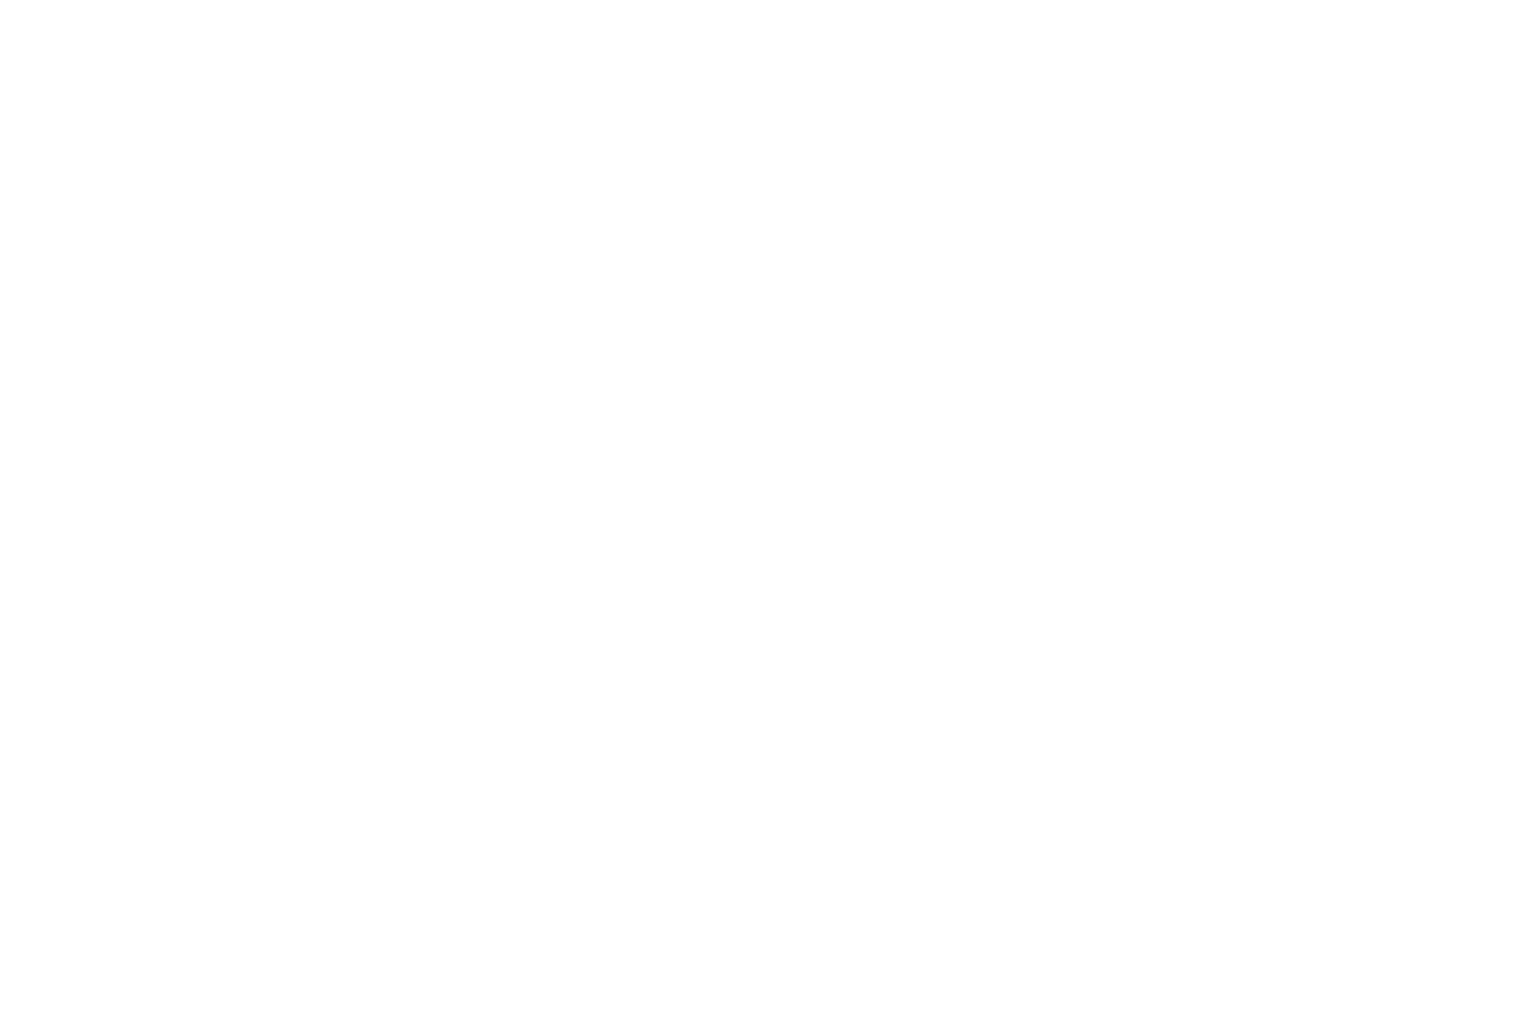

,id,text,sub,relation,object,PERSON,all_ent,noun
0,0,"ith accent clear and strong\n, ráma, aye ráma...",that,flows,feet_path,NaN,free.(4,"[ith accent clear and strong\n, ráma, aye rám..."
1,0,"ith accent clear and strong\n, ráma, aye ráma...",that,feel,feet_path,NaN,free.(4,"[ith accent clear and strong\n, ráma, aye rám..."
2,0,"ith accent clear and strong\n, ráma, aye ráma...",stream_rámáyan,leaves,fount_world_stain,NaN,free.(4,"[ith accent clear and strong\n, ráma, aye rám..."
3,1,",\n,hail, arch-ascetic, pious, good, and kind!...",i,pray,thee,canto i. nárad.(7,first,"[,\n,hail, arch-ascetic, pious, good, and kind..."
4,1,",\n,hail, arch-ascetic, pious, good, and kind!...",i,pray,thee,canto i. nárad.(7,canto i. nárad.(7,"[,\n,hail, arch-ascetic, pious, good, and kind..."


<Figure size 640x480 with 0 Axes>

In [1]:
#v1.2 /Aug08,2023
def spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "DATE",
                records_groupby_id = None, ent_plot_filter = None, threeD_plot = True,
                pos_layout = 'circular_layout', plot_save_path=None):

    '''
    1.4 Aug31,2023 bug fixed, removed else part from each list to dict to df
    1.3 Aug28,2023 updated dtf_final1 after filter/text_data.lower()
    1.2 Aug08,2023 updated for 3D plot/pos for draw
    1.1 May12,2023 added records_groupby_id option/ used to group records like chat @ user is level
    1.0 May03,2023 initial version

    plot_save_path: if not none then it will create Network Graph
    ent_type = NUMERIC, PERSON, ORG, LOC, NUMERIC, DATE
    
    draw methods >>
     'draw',
     'draw_circular',
     'draw_kamada_kawai',
     'draw_networkx',
     'draw_planar',
     'draw_random',
     'draw_shell',
     'draw_spectral',
     'draw_spring',
    '''

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    import spacy 
    import textacy  #0.12.0
    import networkx as nx  #3.0 (also pygraphviz==1.10)
    import dateparser #1.1.7
    
    text_data = text_data.lower()
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text_data)

    #3 from text to a list of sentences
    lst_docs = [sent for sent in doc.sents]

    dic_sub_vrb_obj = {"id":[], "text":[], "sub":[], "relation":[], "object":[]}
    dic_ent = {"id":[], "text":[], ent_type:[]}
    dic_all_ent = {"id":[], "text":[], 'all_ent':[]}
    dic_all_noun = {"id":[], "text":[], 'noun':[]}

    for n, sentence in enumerate(lst_docs):
        #print(f'\n sentence no:{n}, sentence:{sentence}')
        lst_sub_vrb_obj = list(textacy.extract.subject_verb_object_triples(sentence))
        lst_ent = list(textacy.extract.entities(sentence, include_types={ent_type}))
        lst_all_ent = list(textacy.extract.entities(sentence))
        lst_all_noun = list(textacy.extract.noun_chunks(sentence))
        list_all_tokens = list(textacy.extract.words(sentence))
        
#         for token in sentence:
#             print(f'token:{token}, text:{token.text}, tag:{token.tag_}, POS:{token.pos_},\
#             DEP:{token.dep_}, explain:{spacy.explain(token.tag_)},\
#             has_vector:{token.has_vector}, vector_norm:{token.vector_norm}, is_oov:{token.is_oov}')

        #1 lst_ent
        if len(lst_ent) > 0:
            for attr in lst_ent:
                dic_ent["id"].append(n)
                dic_ent["text"].append(sentence.text)
                dic_ent[ent_type].append(str(attr))
#         else:
#             dic_ent["id"].append(n)
#             dic_ent["text"].append(sentence.text)
#             dic_ent[ent_type].append(np.nan)

        dtf_ent = pd.DataFrame(dic_ent)

        #2 lst_all_ent
        if len(lst_all_ent) > 0:
            for attr1 in lst_all_ent:
                dic_all_ent["id"].append(n)
                dic_all_ent["text"].append(sentence.text)
                dic_all_ent['all_ent'].append(str(attr1))
#         else:
#             dic_all_ent["id"].append(n)
#             dic_all_ent["text"].append(sentence.text)
#             dic_all_ent['all_ent'].append(np.nan)

        dtf_all_ent = pd.DataFrame(dic_all_ent)
        if records_groupby_id:
            dtf_all_ent = dtf_all_ent.groupby(records_groupby_id).agg(lambda x: list(x)).reset_index()

        #3 lst_sub_vrb_obj
        if len(lst_sub_vrb_obj) > 0:
            for m, sent in enumerate(lst_sub_vrb_obj): #one sentence can have more than 1 one sub/verb/obj
                subj = "_".join(map(str, sent.subject))
                obj  = "_".join(map(str, sent.object))
                relation = "_".join(map(str, sent.verb))
                dic_sub_vrb_obj["id"].append(n)
                dic_sub_vrb_obj["text"].append(sentence.text)
                dic_sub_vrb_obj["sub"].append(subj)
                dic_sub_vrb_obj["object"].append(obj)
                dic_sub_vrb_obj["relation"].append(relation)
#         else:
#             dic_sub_vrb_obj["id"].append(n)
#             dic_sub_vrb_obj["text"].append(sentence.text)
#             dic_sub_vrb_obj["sub"].append(np.nan)
#             dic_sub_vrb_obj["object"].append(np.nan)
#             dic_sub_vrb_obj["relation"].append(np.nan)

        dtf_sub_vrb_obj = pd.DataFrame(dic_sub_vrb_obj)

        #4 lst_all_noun
        if len(lst_all_noun) > 0:
            for attr1 in lst_all_noun:
                dic_all_noun["id"].append(n)
                dic_all_noun["text"].append(sentence.text)
                dic_all_noun['noun'].append(str(attr1))
#         else:
#             dic_all_noun["id"].append(n)
#             dic_all_noun["text"].append(sentence.text)
#             #dic_all_noun['all_ent'].append(np.nan)
#             dic_all_noun['all_ent'].append('tbc')

        dtf_all_noun = pd.DataFrame(dic_all_noun)
        dtf_all_noun = dtf_all_noun.groupby('id').agg(lambda x: list(x)).reset_index()

    # merge the all files
    dtf_final = dtf_sub_vrb_obj.merge(dtf_ent[[ent_type, 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_ent[['all_ent', 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_noun[['noun', 'id']], how="left", on="id")
    
    if plot_save_path:
        if ent_plot_filter:
            dtf_final1 = dtf_final[(dtf_final["sub"]==ent_plot_filter) | (dtf_final["object"]==ent_plot_filter)]

        ## create full graph
        G = nx.from_pandas_edgelist(dtf_final1, source="sub", target="object", 
                                    edge_attr="relation", create_using=nx.DiGraph())
        
        #chk pos_layout /TBC
#         if pos_layout == 'circular_layout':
#             pos=nx.circular_layout(G, k=1)
#         elif pos_layout == 'spectral_layout':
#             pos=nx.spectral_layout(G, k=1)
#         elif pos_layout == 'spring_layout':
#             pos=nx.spring_layout(G, k=1)
            
        pos = nx.spring_layout(G, k=1)
            
        ## plot
        plt.figure(figsize=(15,10))

        node_color = "skyblue"
        edge_color = "black"

        nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
                edge_color=edge_color, cmap=plt.cm.Dark2, 
                node_size=2000, connectionstyle='arc3,rad=0.1')

        nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                                 edge_labels=nx.get_edge_attributes(G,'relation'),
                                 font_size=12, font_color='black', alpha=0.6)
        plt.show()
        plt.savefig(plot_save_path+'EntityKnowledgeGraph.png')
        
    if threeD_plot: #1.2
        f = ent_plot_filter
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection="3d")
        #ax = fig.gca(projection='3d')
        pos = nx.spring_layout(G, k=2.5, dim=3)

        nodes = np.array([pos[v] for v in sorted(G) if v!=f])
        center_node = np.array([pos[v] for v in sorted(G) if v==f])

        edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v!=f])
        center_edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v==f])

        ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
        ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

        for link in edges:
            ax.plot(*link.T, color="grey", lw=0.5)
        for link in center_edges:
            ax.plot(*link.T, color="red", lw=0.5)

        for v in sorted(G):
            ax.text(*pos[v].T, s=v)
        for u,v in G.edges():
            attr = nx.get_edge_attributes(G, "relation")[(u,v)]
            ax.text(*((pos[u]+pos[v])/2).T, s=attr)

        ax.set(xlabel=None, ylabel=None, zlabel=None, 
               xticklabels=[], yticklabels=[], zticklabels=[])
        ax.grid(False)
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        plt.show()
        plt.savefig(plot_save_path+'EntityKnowledgeGraph3D.png')

    return dtf_final, G

data_path = 'D:\\dataset\\graph\\Ramayana\\'

with open(data_path+'ramayana.txt', 'r', encoding="utf8") as f:
    text_data_list = f.readlines()
    
#text_data = ','.join([str(i) for i in df[text_col].values.tolist()]) # when data is from df
text_data = ','.join([str(i) for i in text_data_list]) # when data is in list

#starting char are index, that's why started from 18500
#text_data = text_data[18500:1000000]#NER models require roughly 1GB of temporary memory per 100,000 characters in the input
text_data = text_data[18500:100000]
#text_data = text_data[18500:20000]

## filter
ent_plot_filter = 'I'
#ent_plot_filter = 'Rama'

dtf_final, G = spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "PERSON",
        records_groupby_id = None, ent_plot_filter = ent_plot_filter, threeD_plot = False, plot_save_path=data_path)

dtf_final.head()

C:\Users\ajverma\AppData\Local\Temp\ipykernel_14512\3117432059.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML
C:\Users\ajverma\AppData\Local\Temp\ipykernel_14512\3117432059.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_kn['grp_by_col']=dtf_kn.apply(lambda x: ','.join(sorted([x['sub'],x['object']])), axis = 1)


len-G.nodes: 607
companies.html
Basic topological attributes
-----------
Total # nodes:  607
Total # edges:  590
First 10 edges:  [('bow', 'he'), ('he', 'birth'), ('he', 'to_hasten_to_the_gathering'), ('he', 'tale_listening_ear'), ('he', 'points_people'), ('he', 'path'), ('he', 'válmíki'), ('he', 'way'), ('he', 'upholders'), ('he', 'guide')]
First 10 nodes:  ['bow', 'he', 'fame_glory_state', 'they', 'glory', 'king', 'race', 'who', 'to_pay', 'spade']
Density of the graph:  0.0032078990436111158
----------------------------------------------------------------
Multigraph ?
-----------
This is NOT a MULTI-GRAPH
----------------------------------------------------------------
Total nodes in the graph:  607
Average degree of graph is :  1.9439868204283361
Max degree of graph is :  94
Min degree of graph is :  1


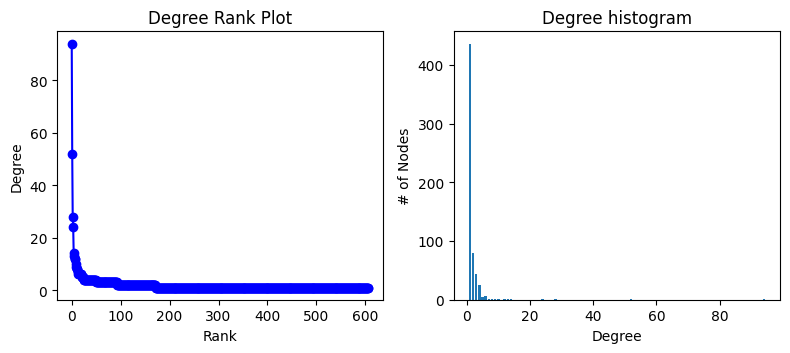

94
# nodes in subgraph :  0
ramayan.html


,frm_node,to_node,partnerships
0,bow,he,18.0
1,fame_glory_state,they,12.0
2,glory,they,9.0
3,king,they,8.0
4,race,who,8.0
...,...,...,...
586,he,sandals(30_pledge,1.0
587,might,we,1.0
588,might,woe,1.0
589,city,king_daśaratha_ground,1.0


In [2]:
#https://medium.com/@preeti.chauhan8/learn-a-z-of-knowledge-graphs-step-by-step-part-5-usecase-pagerank-driven-company-importance-in-1ea953a3bcca
#--- import relevant libs

import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import tensorflow as tf
import networkx as nx
import pyvis
from IPython.core.display import display, HTML
from pyvis import network as net
from pyvis.network import Network

#--- custom defined functions to be used later in the code

#--- flatten nested list
def flattenList(nested_list):
    flat_list = [item for sublist in nested_list for item in sublist]
    return flat_list

#----- removes up to n degree nodes and return the subgraph
def rmv_n_dgree_nodes(G,deg):
    # remove low-degree nodes
    low_degree = [n for n, d in G.degree() if d <= deg]
    low_degree_graph = G.remove_nodes_from(low_degree)
    return low_degree_graph

#--- degree analysis of the graph
def degree_analysis(G):
    #----1.) degree analysis
    print("Total nodes in the graph: ",len(G.nodes()))
    G_degree=G.degree()
    print("Average degree of graph is : ", np.mean([d for _, d in G_degree]))
    print("Max degree of graph is : ", np.max([d for _, d in G_degree]))

    print("Min degree of graph is : ", np.min([d for _, d in G_degree]))
            
    #----2.) plot degree distribution
        
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of fb pages graph conected by likes", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

#--- get immediate neighbourhood (node list) from a initial list of nodes with degree>= min_deg. 
#----You can modify it to get n level neighbourhood also!
def get_neighbourhood(G,target_nodes,min_deg=0):

    """This function takes a Graph and list of initial nodes. Returns the set of immediate neighbours of these nodes which is grater than degree provided"""
    total_neighbours=0
    nodes_set=[target_nodes]
    for node in target_nodes:
        #print(node)
        neighbours=list(G.neighbors(node))
        total_neighbours=total_neighbours+len(neighbours)     
        nodes_set.append(neighbours)
    print(total_neighbours)
    nodes_set=flattenList(nodes_set)
    
    #-- get the list of all nodes with lower degrees:
    if min_deg >0:
        low_degree = [n for n, d in G.degree() if d <= min_deg]
        #--- minus these low degree odes from nodes_set
        nodes_set = [x for x in nodes_set if x not in low_degree]
    
    return list(set(nodes_set))


dtf_kn = dtf_final[['sub', 'object']]

dtf_kn['grp_by_col']=dtf_kn.apply(lambda x: ','.join(sorted([x['sub'],x['object']])), axis = 1)
dtf_kn=dtf_kn.groupby(['grp_by_col']).size().sort_values(ascending=False).reset_index(name='partnerships').drop_duplicates()
dtf_kn['partnerships'] = np.ceil((dtf_kn['partnerships'].values / 2))
dtf_kn['frm_node']=dtf_kn.apply(lambda x: x['grp_by_col'].split(',')[0], axis = 1)
dtf_kn['to_node']=dtf_kn.apply(lambda x: x['grp_by_col'].split(',')[1], axis = 1)
dtf_kn=dtf_kn.drop(columns=['grp_by_col'])
cols=['frm_node','to_node','partnerships']
dtf_kn = dtf_kn[cols]


import tensorflow as tf
import networkx as nx
from pyvis.network import Network

#--- create weighted G from edge list df
with tf.device('/GPU:0'):
    G = nx.from_pandas_edgelist(dtf_kn, 'frm_node', 'to_node',edge_attr='partnerships')
print('len-G.nodes:',len(G.nodes()))

#--- basic ifo about the graph
#print('info-G:',nx.info(G))

#--- let's save this graph for later use
nx.write_gexf(G, "techcompaniesnetwork_full.gexf")

#---- reading gefx graph
#G1=nx.read_gexf("./techcompaniesnetwork_full.gexf")

#---- let's visualize the graph, since graph is too big, let's pick 1000 nodes to be visualized
#--- create subgraph view with nodes ids < 101

'''
Warning: When  cdn_resources is 'local' jupyter notebook has issues displaying graphics on chrome/safari.
Use cdn_resources='in_line' or cdn_resources='remote' if you have issues viewing graphics in a notebook.
companies.html
'''
cdn_resources='in_line'
#cdn_resources='remote'

top100=dtf_kn['frm_node'].unique()[0:100]
def filter_node(n1):
    return n1 in top100

with tf.device('/GPU:0'):
    view = nx.subgraph_view(G, filter_node=filter_node)
#view.nodes()

G_100=view

#----- plot the graph ---

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
got_net.from_nx(G_100)
got_net.show("companies.html")

#--- check no. of nodes and edges
import networkx.algorithms.components as nx_comp
import networkx.algorithms.connectivity as nx_conn
    
#shortest_path_lengths=shortest_path_lengths()
with tf.device('/GPU:0'):
        #-- let's see basic stats, no. of nodes and edges
        print("Basic topological attributes")
        print("-----------")
        print("Total # nodes: ", len(G.nodes()))
        print("Total # edges: ", len(G.edges()))
        edges= G.edges()
        nodes= G.nodes()
        print("First 10 edges: ",list(edges)[0:10])
        print("First 10 nodes: ",list(nodes)[0:10])
        # This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
        # reusing the pre-computed shortest path lengths!
        #diameter = max(nx.eccentricity(G, sp=shortest_path_lengths()).values())
        #print("Diameter of the graph is : ",diameter)

        #---- Density of the graph, to measure how dense or sparse the graph is
        print("Density of the graph: ",nx.density(G))
        print("----------------------------------------------------------------")

#--- Is this a multigraph
print("Multigraph ?")
print("-----------")
if G.is_multigraph():
    # We can check if there is a walk through the graph that crosses each node once and only once, and begins and ends at the same point. 
    # Such a walk is called an Eulerian circuit of a multigraph.
    if nx.is_eulerian(G):
        print("This is MULTI-GRAPH and a Eulerian circuit exists in a multigraph")
    else:
        print("This is MULTI-GRAPH but NO Eulerian circuit exists in a multigraph")
else:
    print("This is NOT a MULTI-GRAPH")
print("----------------------------------------------------------------")

#---- Calculate the weighted pagerank og the bigger graph G
df_pagerank= pd.DataFrame(sorted(nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight').items(), key=lambda x:x[1], reverse=True), columns=['Companies', "PageRank"])
df_pagerank.head(20)

'''since the graph is still huge to be plotted, will prune low degree nodes and will plot resulting graph — — 
before doing so, let’s do degree analysis of the graph
'''

#-- call degree analysis function
degree_analysis(G)

#-- Let's get their neighborhood and prune the low degree nodes
min_degree=200
top_n =1 #--- lets see neighbourhood of top company
lst_top_n=df_pagerank.head(top_n)['Companies']
top_n_nghbr=get_neighbourhood(G,lst_top_n,min_degree)
# geerate top 10 comapnies neighbourhood graph
top_n_nghbr_subgraph=nx.subgraph(G,top_n_nghbr)
print("# nodes in subgraph : ",len(top_n_nghbr_subgraph.nodes()))

#--- now plot the above graph where node size represet pagerak
#--- get the pagerank for the nnodes in graph
top_n_nodes= top_n_nghbr_subgraph.nodes()
df_top_n_nodes =pd.DataFrame(top_n_nodes,columns=['Companies'])
df_top_n_nodes_pr=pd.merge(df_top_n_nodes,df_pagerank,how='left',on='Companies')
df_top_n_nodes_pr.head()

node_size= df_top_n_nodes_pr['PageRank']*5000
node_list=list(top_n_nghbr_subgraph.nodes)

#creating size and label dictioaries
size_dict={node:int(node_size[idx]) for idx,node in enumerate(node_list)}
label_dict={node:str(node_list[idx]) for idx,node in enumerate(node_list)}

#----- plot the graph ---
#g_nx = nx.draw(top5_nghbr_subgraph, nodelist=node_list, node_size=node_size)
#plt.show()

#Get and assign node sizes proportional to the pagerak
nx.set_node_attributes(top_n_nghbr_subgraph, size_dict, name="size")

#Get and assign pyvis labels for elegant plotting
nx.set_node_attributes(top_n_nghbr_subgraph, label_dict, name="label")

#Remap the node ids to strings to avoid error with PyVis
#g_nx = nx.relabel_nodes(g_nx, label_dict)    

#Plot the resulting netwrokX graph using PyVis
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)#, select_menu=True)
g_pyvis.from_nx(top_n_nghbr_subgraph)
#g_pyvis.show_buttons(filter_=['nodes']) # Option to control visualization of nodes
g_pyvis.show('ramayan.html')
dtf_kn

C:\Users\ajverma\AppData\Local\Temp\ipykernel_14512\643506190.py:11: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


len-G.nodes: 53795
companies.html
Basic topological attributes
-----------
Total # nodes:  53795
Total # edges:  250426
First 10 edges:  [('Cisco', 'Google'), ('Cisco', 'Verizon'), ('Cisco', 'Oracle'), ('Cisco', 'IBM'), ('Cisco', 'Intel'), ('Cisco', 'SAP'), ('Cisco', 'Microsoft'), ('Cisco', 'Dell'), ('Cisco', 'Juniper Networks'), ('Cisco', 'Motorola')]
First 10 nodes:  ['Cisco', 'Google', 'Amazon', 'Facebook', 'IBM', 'Apple Inc.', 'Oracle', 'Intel', 'PayPal', 'Sony']
Density of the graph:  0.0001730747296308625
----------------------------------------------------------------
Multigraph ?
-----------
This is NOT a MULTI-GRAPH
----------------------------------------------------------------
Total nodes in the graph:  53795
Average degree of graph is :  9.310382005762618
Max degree of graph is :  12424
Min degree of graph is :  1


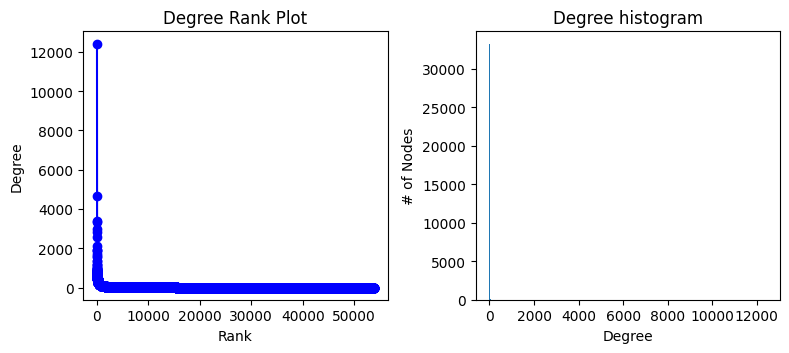

12424
# nodes in subgraph :  298
compay_network.html


In [3]:
#https://medium.com/@preeti.chauhan8/learn-a-z-of-knowledge-graphs-step-by-step-part-5-usecase-pagerank-driven-company-importance-in-1ea953a3bcca
#--- import relevant libs

import pandas as pd
import numpy as np
import json as json
import matplotlib.pyplot as plt
import tensorflow as tf
import networkx as nx
import pyvis
from IPython.core.display import display, HTML
from pyvis import network as net
from pyvis.network import Network

#--- custom defined functions to be used later in the code

#--- flatten nested list
def flattenList(nested_list):
    flat_list = [item for sublist in nested_list for item in sublist]
    return flat_list

#----- removes up to n degree nodes and return the subgraph
def rmv_n_dgree_nodes(G,deg):
    # remove low-degree nodes
    low_degree = [n for n, d in G.degree() if d <= deg]
    low_degree_graph = G.remove_nodes_from(low_degree)
    return low_degree_graph

#--- degree analysis of the graph
def degree_analysis(G):
    #----1.) degree analysis
    print("Total nodes in the graph: ",len(G.nodes()))
    G_degree=G.degree()
    print("Average degree of graph is : ", np.mean([d for _, d in G_degree]))
    print("Max degree of graph is : ", np.max([d for _, d in G_degree]))

    print("Min degree of graph is : ", np.min([d for _, d in G_degree]))
            
    #----2.) plot degree distribution
        
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of fb pages graph conected by likes", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

#--- get immediate neighbourhood (node list) from a initial list of nodes with degree>= min_deg. 
#----You can modify it to get n level neighbourhood also!
def get_neighbourhood(G,target_nodes,min_deg=0):

    """This function takes a Graph and list of initial nodes. Returns the set of immediate neighbours of these nodes which is grater than degree provided"""
    total_neighbours=0
    nodes_set=[target_nodes]
    for node in target_nodes:
        #print(node)
        neighbours=list(G.neighbors(node))
        total_neighbours=total_neighbours+len(neighbours)     
        nodes_set.append(neighbours)
    print(total_neighbours)
    nodes_set=flattenList(nodes_set)
    
    #-- get the list of all nodes with lower degrees:
    if min_deg >0:
        low_degree = [n for n, d in G.degree() if d <= min_deg]
        #--- minus these low degree odes from nodes_set
        nodes_set = [x for x in nodes_set if x not in low_degree]
    
    return list(set(nodes_set))

data_path = 'D:\\dataset\\graph\\RelatoBusinessGraphDatabase\\'
# configure file path
#file_path_1='./relato-busiess-dataset/companies.json'
#file_path_2='./relato-busiess-dataset/links.json'

file_path_1 = data_path + 'companies.json'
file_path_2 = data_path + 'links.json'

#--load companies
cmpny_lnk_data = [json.loads(line) for line in open(file_path_2, 'r', encoding='utf-8')]
len_cmpny=len(cmpny_lnk_data)-1
lst_frm_cmpny=[]
lst_to_cmpny=[]
for i in np.arange(1,len_cmpny):
    try:
        lst_frm_cmpny.append(cmpny_lnk_data[i]['home_name'])
        lst_to_cmpny.append(cmpny_lnk_data[i]['link_name'])
    except Exception as e:
        pass
        #print("Next entry.")
        
#--- create companies relationship dataframe
df_cmpny = pd.DataFrame(np.column_stack([lst_frm_cmpny, lst_to_cmpny]), columns=['frm_node','to_node'])
df_cmpny.head(2)

#A-->B = B->A. Lets remove any such duplicates, calculates non duplicate partnerships
df_cmpny['grp_by_col']=df_cmpny.apply(lambda x: ','.join(sorted([x['frm_node'],x['to_node']])), axis = 1)
df_cmpny=df_cmpny.groupby(['grp_by_col']).size().sort_values(ascending=False).reset_index(name='partnerships').drop_duplicates()
df_cmpny['partnerships'] = np.ceil((df_cmpny['partnerships'].values / 2))
df_cmpny['frm_node']=df_cmpny.apply(lambda x: x['grp_by_col'].split(',')[0], axis = 1)
df_cmpny['to_node']=df_cmpny.apply(lambda x: x['grp_by_col'].split(',')[1], axis = 1)
df_cmpny=df_cmpny.drop(columns=['grp_by_col'])
cols=['frm_node','to_node','partnerships']
df_cmpny = df_cmpny[cols]
df_cmpny.head(1)

#--- create weighted G from edge list df
with tf.device('/GPU:0'):
    G = nx.from_pandas_edgelist(df_cmpny, 'frm_node', 'to_node',edge_attr='partnerships')
print('len-G.nodes:',len(G.nodes()))

#--- basic ifo about the graph
#print('info-G:',nx.info(G))

#--- let's save this graph for later use
nx.write_gexf(G, "techcompaniesnetwork_full.gexf")

#---- reading gefx graph
#G1=nx.read_gexf("./techcompaniesnetwork_full.gexf")

#---- let's visualize the graph, since graph is too big, let's pick 1000 nodes to be visualized
#--- create subgraph view with nodes ids < 101
'''
Warning: When  cdn_resources is 'local' jupyter notebook has issues displaying graphics on chrome/safari.
Use cdn_resources='in_line' or cdn_resources='remote' if you have issues viewing graphics in a notebook.
companies.html
'''
#cdn_resources='in_line'
cdn_resources='remote'
top100=df_cmpny['frm_node'].unique()[0:100]
def filter_node(n1):
    return n1 in top100

with tf.device('/GPU:0'):
    view = nx.subgraph_view(G, filter_node=filter_node)
#view.nodes()

G_100=view

#----- plot the graph ---

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
got_net.from_nx(G_100)
got_net.show("companies.html")


#--- check no. of nodes and edges
import networkx.algorithms.components as nx_comp
import networkx.algorithms.connectivity as nx_conn
    
#shortest_path_lengths=shortest_path_lengths()
with tf.device('/GPU:0'):
        #-- let's see basic stats, no. of nodes and edges
        print("Basic topological attributes")
        print("-----------")
        print("Total # nodes: ", len(G.nodes()))
        print("Total # edges: ", len(G.edges()))
        edges= G.edges()
        nodes= G.nodes()
        print("First 10 edges: ",list(edges)[0:10])
        print("First 10 nodes: ",list(nodes)[0:10])
        # This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
        # reusing the pre-computed shortest path lengths!
        #diameter = max(nx.eccentricity(G, sp=shortest_path_lengths()).values())
        #print("Diameter of the graph is : ",diameter)

        #---- Density of the graph, to measure how dense or sparse the graph is
        print("Density of the graph: ",nx.density(G))
        print("----------------------------------------------------------------")
        
#--- Is this a multigraph
print("Multigraph ?")
print("-----------")
if G.is_multigraph():
    # We can check if there is a walk through the graph that crosses each node once and only once, and begins and ends at the same point. 
    # Such a walk is called an Eulerian circuit of a multigraph.
    if nx.is_eulerian(G):
        print("This is MULTI-GRAPH and a Eulerian circuit exists in a multigraph")
    else:
        print("This is MULTI-GRAPH but NO Eulerian circuit exists in a multigraph")
else:
    print("This is NOT a MULTI-GRAPH")
print("----------------------------------------------------------------")

#---- Calculate the weighted pagerank og the bigger graph G
df_pagerank= pd.DataFrame(sorted(nx.pagerank(G, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight').items(), key=lambda x:x[1], reverse=True), columns=['Companies', "PageRank"])
df_pagerank.head(20)

'''since the graph is still huge to be plotted, will prune low degree nodes and will plot resulting graph — — 
before doing so, let’s do degree analysis of the graph
'''

#-- call degree analysis function
degree_analysis(G)

#-- Let's get their neighborhood and prune the low degree nodes
min_degree=200
top_n =1 #--- lets see neighbourhood of top company
lst_top_n=df_pagerank.head(top_n)['Companies']
top_n_nghbr=get_neighbourhood(G,lst_top_n,min_degree)
# geerate top 10 comapnies neighbourhood graph
top_n_nghbr_subgraph=nx.subgraph(G,top_n_nghbr)
print("# nodes in subgraph : ",len(top_n_nghbr_subgraph.nodes()))

#--- now plot the above graph where node size represet pagerak
#--- get the pagerank for the nnodes in graph
top_n_nodes= top_n_nghbr_subgraph.nodes()
df_top_n_nodes =pd.DataFrame(top_n_nodes,columns=['Companies'])
df_top_n_nodes_pr=pd.merge(df_top_n_nodes,df_pagerank,how='left',on='Companies')
df_top_n_nodes_pr.head()

node_size= df_top_n_nodes_pr['PageRank']*5000
node_list=list(top_n_nghbr_subgraph.nodes)

#creating size and label dictioaries
size_dict={node:int(node_size[idx]) for idx,node in enumerate(node_list)}
label_dict={node:str(node_list[idx]) for idx,node in enumerate(node_list)}

#----- plot the graph ---
#g_nx = nx.draw(top5_nghbr_subgraph, nodelist=node_list, node_size=node_size)
#plt.show()

#Get and assign node sizes proportional to the pagerak
nx.set_node_attributes(top_n_nghbr_subgraph, size_dict, name="size")

#Get and assign pyvis labels for elegant plotting
nx.set_node_attributes(top_n_nghbr_subgraph, label_dict, name="label")

#Remap the node ids to strings to avoid error with PyVis
#g_nx = nx.relabel_nodes(g_nx, label_dict)    

#Plot the resulting netwrokX graph using PyVis
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)#, select_menu=True)
g_pyvis.from_nx(top_n_nghbr_subgraph)
#g_pyvis.show_buttons(filter_=['nodes']) # Option to control visualization of nodes
g_pyvis.show('compay_network.html')

In [3]:
df_cmpny

,frm_node,to_node,partnerships
0,Cisco,Google,5.0
1,Amazon,Facebook,5.0
2,Google,IBM,5.0
3,Apple Inc.,Oracle,5.0
4,Facebook,Intel,5.0
...,...,...,...
251485,EnCana Oil & Gas,Intel,1.0
251486,EnCana Oil & Gas,JGC CORPORATION,1.0
251487,Autosplice,Mercedes,1.0
251488,EnCana Oil & Gas,NGP Energy Capital Management,1.0


In [ ]:
#---- let's visualize the graph, since graph is too big, let's pick 1000 nodes to be visualized
#--- create subgraph view with nodes ids < 101
'''
Warning: When  cdn_resources is 'local' jupyter notebook has issues displaying graphics on chrome/safari.
Use cdn_resources='in_line' or cdn_resources='remote' if you have issues viewing graphics in a notebook.
companies.html
'''
#cdn_resources='in_line'
cdn_resources='remote'
top100=df_cmpny['frm_node'].unique()[0:100]
def filter_node(n1):
    return n1 in top100

with tf.device('/GPU:0'):
    view = nx.subgraph_view(G, filter_node=filter_node)
#view.nodes()

G_100=view

#----- plot the graph ---

got_net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
got_net.from_nx(G_100)
got_net.show("companies.html")



In [ ]:
#--- now plot the above graph where node size represet pagerak
#--- get the pagerank for the nnodes in graph
top_n_nodes= top_n_nghbr_subgraph.nodes()
df_top_n_nodes =pd.DataFrame(top_n_nodes,columns=['Companies'])
df_top_n_nodes_pr=pd.merge(df_top_n_nodes,df_pagerank,how='left',on='Companies')
df_top_n_nodes_pr.head()

node_size= df_top_n_nodes_pr['PageRank']*5000
node_list=list(top_n_nghbr_subgraph.nodes)

#creating size and label dictioaries
size_dict={node:int(node_size[idx]) for idx,node in enumerate(node_list)}
label_dict={node:str(node_list[idx]) for idx,node in enumerate(node_list)}

#----- plot the graph ---
#g_nx = nx.draw(top5_nghbr_subgraph, nodelist=node_list, node_size=node_size)
#plt.show()

#Get and assign node sizes proportional to the pagerak
nx.set_node_attributes(top_n_nghbr_subgraph, size_dict, name="size")

#Get and assign pyvis labels for elegant plotting
nx.set_node_attributes(top_n_nghbr_subgraph, label_dict, name="label")

#Remap the node ids to strings to avoid error with PyVis
#g_nx = nx.relabel_nodes(g_nx, label_dict)    

#Plot the resulting netwrokX graph using PyVis
g_pyvis = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)#, select_menu=True)
g_pyvis.from_nx(top_n_nghbr_subgraph)
#g_pyvis.show_buttons(filter_=['nodes']) # Option to control visualization of nodes
g_pyvis.show('compay_network.html')

In [ ]:
#https://medium.com/@preeti.chauhan8/lets-learn-a-z-of-knowledge-graphs-one-step-at-a-time-part-3-sum-total-of-exploratory-graph-4adbfc7cad33

#----- CUSTOM FUNCTIONS to get graph level stats----------

#---returns a dict-of-dict that maps a node u to all other nodes in the network, where the inner-most mapping returns the length of the shortest path between the two nodes. 
def shortest_path_lengths():
    import networkx as nx
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
    return shortest_path_lengths

def get_all_centralities(G):
    import tensorflow as tf
    
    with tf.device('/GPU:0'):
        df_degree_centrality= pd.DataFrame(sorted(nx.degree_centrality(G).items(), key=lambda x:x[1], reverse=True), columns=['Pages', "Degree Centrality"])
        df_closeness_centrality= pd.DataFrame(sorted(nx.closeness_centrality(G).items(), key=lambda x:x[1], reverse=True), columns=['Pages', "Closeness Centrality"])
        df_betweenness_centrality= pd.DataFrame(sorted(nx.betweenness_centrality(G).items(), key=lambda x:x[1], reverse=True), columns=['Pages', "Betweeness Centrality"])
        df_eigenvector_centrality= pd.DataFrame(sorted(nx.eigenvector_centrality(G).items(), key=lambda x:x[1], reverse=True), columns=['Pages', "Eigenvector Centrality"])
        df_pagerank= pd.DataFrame(sorted(nx.pagerank(G).items(), key=lambda x:x[1], reverse=True), columns=['Pages', "PageRank"])
        hub, auth = nx.hits(G)
        df_hubs =pd.DataFrame(sorted(hub.items(), key=lambda x:x[1], reverse=True), columns=['Pages', "Hub"])
        df_authorities= pd.DataFrame(sorted(auth.items(), key=lambda x:x[1], reverse=True), columns=['Pages', "Authorities"])

        df_all_centralities = df_degree_centrality.merge(df_closeness_centrality,on='Pages',how='inner').merge(df_betweenness_centrality,on='Pages',how='inner').merge(df_eigenvector_centrality,on='Pages',how='inner').merge(df_pagerank,on='Pages',how='inner').merge(df_hubs,on='Pages',how='inner').merge(df_authorities,on='Pages',how='inner')
        df_all_centralities_sorted=df_all_centralities.sort_values(by=["Degree Centrality"])
        df_top10_degree=df_all_centralities_sorted.head(10)
        df_bottom10_degree=df_all_centralities_sorted.tail(10)
    return df_all_centralities_sorted,df_degree_centrality,df_closeness_centrality,df_betweenness_centrality,df_eigenvector_centrality,df_pagerank

#--- fuction to return graph-level metrics
def get_graph_lvl_metrics(G,shortest_path_lengths=shortest_path_lengths(), get_all_centralities=get_all_centralities):
    import networkx.algorithms.components as nx_comp
    import networkx.algorithms.connectivity as nx_conn
    import tensorflow as tf
    import networkx as nx
    import numpy as np
    
    #shortest_path_lengths=shortest_path_lengths()
    with tf.device('/GPU:0'):
        #-- let's see basic stats, no. of nodes and edges
        print("Basic topological attributes")
        print("-----------")
        print("Total # nodes: ", len(G.nodes()))
        print("Total # edges: ", len(G.edges()))
        edges= G.edges()
        nodes= G.nodes()
        print("First 10 edges: ",list(edges)[0:10])
        print("First 10 nodes: ",list(nodes)[0:10])
        # This is equivalent to `diameter = nx.diameter(G), but much more efficient since we're
        # reusing the pre-computed shortest path lengths!
        
        ## temp some error
        ##diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
        ##print("Diameter of the graph is : ",diameter)

        #---- Density of the graph, to measure how dense or sparse the graph is
        print("Density of the graph: ",nx.density(G))
        print("----------------------------------------------------------------")

        #--- Is this a multigraph
        print("Multigraph ?")
        print("-----------")
        if G.is_multigraph():
            # We can check if there is a walk through the graph that crosses each node once and only once, and begins and ends at the same point. 
            # Such a walk is called an Eulerian circuit of a multigraph.
            if nx.is_eulerian(G):
                print("This is MULTI-GRAPH and a Eulerian circuit exists in a multigraph")
            else:
                print("This is MULTI-GRAPH but NO Eulerian circuit exists in a multigraph")
        else:
            print("This is NOT a MULTI-GRAPH")
        print("----------------------------------------------------------------")

        #--- if graph is directed the print the connectivity metric
        #--- Connectivity stats tells about the structural components of the graph, if there exist strongly, weakly conected components in graph or otherwise
        print("CONNECTIVITY STATS")
        print("-----------")
        if G.is_directed():
            if nx_comp.is_strongly_connected(G):
                print("This is a strongly connected graph!")
                print("# strongly connected components: ",nx_comp.number_strongly_connected_components(G))
                print("List of strongly connected components: ", nx_comp.strongly_connected_components(G))
            elif nx_comp.is_weakly_connected(G):
                print("This is a weakly connected graph!")
                print("# weakly connected components: ",nx_comp.number_weakly_connected_components(G))
                print("List of weakly connected components: ", nx_comp.weakly_connected_components(G))
            elif nx_comp.is_semiconnected(G):
                print("This is a semi-connected graph!")
            else:
                print("The graph is NOT connected!")
        else:
            if nx_comp.is_connected(G):
                print("This is a connected graph!")
                print("# connected components: ",nx_comp.number_connected_components(G))
                print("List of connected components: ", nx_comp.connected_components(G))
            else:
                print("The graph is NOT connected!")
        #------bridges
        #First of all, an edge joining two nodes A and B in the graph is considered a bridge, if deleting the edge would cause A and B to lie in two different components. 
        #Now it is checked if there are any bridges in this network:
        print("does graph as any bridges?")
        
#         if nx.has_bridges(G):
#             bridges = list(nx.bridges(G))
#             print("The graph has BRIDGES")
#             print("# bridges: ",len(bridges))
#             print("List of bridges: ",bridges)
#         else:
#             print("The graph does NOT have any BRIDGES")
        print("----------------------------------------------------------------")
        #-- let's see graph degree
        #-- The average degree of an undirected graph is the sum of the degrees of all its nodes divided by the number of nodes in the graph. 
        #--It is a measure of the connectedness of a graph.
        print("AVERAGE GRAPH DEGREE")
        print("-----------")
        G_degree=G.degree()
        print("Average degree of graph is : ", np.mean([d for _, d in G_degree]))
        print("Max degree of graph is : ", np.max([d for _, d in G_degree]))
        print("Min degree of graph is : ", np.min([d for _, d in G_degree]))
        #-- Let's see how degree is distributed over nodes
        print("Degree distribution..")
        #with tf.device('/GPU:0'):
        print("----------------------------------------------------------------")
        
        print('AVERAGE SHORTEST PATH')
        print("-----------")
        # Compute the average shortest path length for each node
        average_path_lengths = [np.mean(list(spl.values())) for spl in shortest_path_lengths.values()]
        # The average over all nodes
        print("Average shortest path over all nodes : ",np.mean(average_path_lengths))

        print("----------------------------------------------------------------")
        
        print("GRAPH CENTRALITY STATS")
        print("-----------")
        df_all,df_deg,df_close,df_btwn,df_eigen,df_pgrnk = get_all_centralities(G)
        print("top 5 pages by degree centrality--->")
        print(df_deg.head(5))
        print("top 5 pages by closenness centrality--->")
        print(df_close.head(5))
        print("top 5 pages by betweenness centrality--->")
        print(df_btwn.head(5))
        print("top 5 pages by eigenvector centrality--->")
        print(df_eigen.head(5))
        print("top 5 pages by pagerank--->")
        print(df_pgrnk.head(5))
        print("comparative cenntrality scores sorted by top 5 pages by degree--->")
        print(df_all.tail(5))
        print("comparative cenntrality scores sorted by bottom 5 pages by degree--->")
        print(df_all.head(5))
        print("----------------------------------------------------------------")   
        
        print("GRAPH CLUSTERING STATS")
        print("-----------")
        #The clustering coefficient of a node  is defined as the probability that two randomly selected friends of  are friends with each other.
        print("Average clustering coeficient of the graph: ",nx.average_clustering(G))
        print("----------------------------------------------------------------")
        
#Now, since we have the graph with us, Let's get the graph stats:
get_graph_lvl_metrics(G)

In [13]:
#https://www.kaggle.com/code/kaggleaccount2112/extract-explainable-aiml-articles-from-arxiv-data

# imports for arXiv search
import pandas as pd
import json
from collections import defaultdict

print('Setup Complete.')
# 'xai' is kept as a single term keyword
single_term_keywords = ['xai']

descriptors = ['explainable', 'transparent', 'interpretable']
terms = ['ai', 'machine learning', 'aiml']

keywords = [f'{descriptor} {term}' for descriptor in descriptors for term in terms]
keywords.extend(single_term_keywords)

descriptors_anti = ['black-box', 'black box', 'opaque', 'uninterpretable', 'non-transparent', 'inexplicable', 'unexplainable']
anti_keywords = [f'{descriptor} {term}' for descriptor in descriptors_anti for term in terms]

print(f'Keywords: {", ".join(keywords)}')
print(f'Anti-Keywords: {", ".join(anti_keywords)}')

# Create a dictionary to keep count of articles for each keyword
keyword_counts = defaultdict(int)
anti_keyword_counts = defaultdict(int)

# List to store articles
articles = []

data_path = 'D:\\dataset\\graph\\ArxivMetaData\\'
file_name = 'arxiv-metadata-oai-snapshot.json'
file_path = data_path + file_name

#with open('/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json', 'r') as f:
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        article = json.loads(line)
        title = article.get('title', '').lower()
        abstract = article.get('abstract', '').lower()

        # keep a list of keywords that match for this article
        matching_keywords = [keyword for keyword in keywords if keyword in abstract or keyword in title]
        matching_anti_keywords = [keyword for keyword in anti_keywords if keyword in abstract or keyword in title]

        # increment count for each keyword found in the title or abstract
        for keyword in matching_keywords:
            keyword_counts[keyword] += 1

        for keyword in matching_anti_keywords:
            anti_keyword_counts[keyword] += 1

        if matching_keywords or matching_anti_keywords: 
            # append the matching keywords to the article data
            article['matching_keywords'] = matching_keywords
            article['matching_anti_keywords'] = matching_anti_keywords
            articles.append(article)

        # print the first 10 article titles
        if i < 10:
            print('Title:', title)

# convert the list of articles into a DataFrame
df = pd.DataFrame(articles)
df.head()

Setup Complete.
Keywords: explainable ai, explainable machine learning, explainable aiml, transparent ai, transparent machine learning, transparent aiml, interpretable ai, interpretable machine learning, interpretable aiml, xai
Anti-Keywords: black-box ai, black-box machine learning, black-box aiml, black box ai, black box machine learning, black box aiml, opaque ai, opaque machine learning, opaque aiml, uninterpretable ai, uninterpretable machine learning, uninterpretable aiml, non-transparent ai, non-transparent machine learning, non-transparent aiml, inexplicable ai, inexplicable machine learning, inexplicable aiml, unexplainable ai, unexplainable machine learning, unexplainable aiml
Title: calculation of prompt diphoton production cross sections at tevatron and
  lhc energies
Title: sparsity-certifying graph decompositions
Title: the evolution of the earth-moon system based on the dark matter field
  fluid model
Title: a determinant of stirling cycle numbers counts unlabeled acycli

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,matching_keywords,matching_anti_keywords
0,1301.4564,Rafael Najmanovich,Rafael Najmanovich,Protein flexibility upon ligand binding: Docki...,Thesis for the degree Doctor of Philosophy sub...,None,None,None,q-bio.BM,http://arxiv.org/licenses/nonexclusive-distrib...,Side chain flexibility is an important facto...,"[{'version': 'v1', 'created': 'Sat, 19 Jan 201...",2013-01-22,"[[Najmanovich, Rafael, ]]",[xai],[]
1,1406.6200,Thijs van Ommen,Thijs van Ommen,Combining predictions from linear models when ...,"12 pages, 2 figures. To appear in Proceedings ...",None,None,None,stat.ME cs.LG stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,Methods for combining predictions from diffe...,"[{'version': 'v1', 'created': 'Tue, 24 Jun 201...",2014-06-25,"[[van Ommen, Thijs, ]]",[xai],[]
2,1503.05526,Fabrice Rossi,"Tsirizo Rabenoro (SAMM), J\'er\^ome Lacaille, ...",Interpretable Aircraft Engine Diagnostic via E...,arXiv admin note: substantial text overlap wit...,Transactions on Machine Learning and Data Mini...,None,None,stat.ML cs.LG math.ST stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Detecting early signs of failures (anomalies...,"[{'version': 'v1', 'created': 'Wed, 18 Mar 201...",2015-03-19,"[[Rabenoro, Tsirizo, , SAMM], [Lacaille, Jérôm...",[interpretable ai],[]
3,1606.05798,Guolong Su,"Guolong Su, Dennis Wei, Kush R. Varshney, Dmit...",Interpretable Two-level Boolean Rule Learning ...,presented at 2016 ICML Workshop on Human Inter...,None,None,WHI 2016 submission,stat.ML cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,As a contribution to interpretable machine l...,"[{'version': 'v1', 'created': 'Sat, 18 Jun 201...",2016-06-21,"[[Su, Guolong, ], [Wei, Dennis, ], [Varshney, ...",[interpretable machine learning],[]
4,1606.07163,William Souillard-Mandar,"William Souillard-Mandar, Randall Davis, Cynth...",Interpretable Machine Learning Models for the ...,Presented at 2016 ICML Workshop on Human Inter...,None,None,None,stat.ML cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,"The Clock Drawing Test (CDT) is a rapid, ine...","[{'version': 'v1', 'created': 'Thu, 23 Jun 201...",2016-06-24,"[[Souillard-Mandar, William, ], [Davis, Randal...",[interpretable machine learning],[]


In [14]:
data = df.copy()

data['author_pairs']=data['authors'].apply(lambda x:list(combinations(x, 2)))
data.head()

,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed,matching_keywords,matching_anti_keywords,author_pairs
0,1301.4564,Rafael Najmanovich,Rafael Najmanovich,Protein flexibility upon ligand binding: Docki...,Thesis for the degree Doctor of Philosophy sub...,None,None,None,q-bio.BM,http://arxiv.org/licenses/nonexclusive-distrib...,Side chain flexibility is an important facto...,"[{'version': 'v1', 'created': 'Sat, 19 Jan 201...",2013-01-22,"[[Najmanovich, Rafael, ]]",[xai],[],"[(R, a), (R, f), (R, a), (R, e), (R, l), (R, ..."
1,1406.6200,Thijs van Ommen,Thijs van Ommen,Combining predictions from linear models when ...,"12 pages, 2 figures. To appear in Proceedings ...",None,None,None,stat.ME cs.LG stat.ML,http://arxiv.org/licenses/nonexclusive-distrib...,Methods for combining predictions from diffe...,"[{'version': 'v1', 'created': 'Tue, 24 Jun 201...",2014-06-25,"[[van Ommen, Thijs, ]]",[xai],[],"[(T, h), (T, i), (T, j), (T, s), (T, ), (T, v..."
2,1503.05526,Fabrice Rossi,"Tsirizo Rabenoro (SAMM), J\'er\^ome Lacaille, ...",Interpretable Aircraft Engine Diagnostic via E...,arXiv admin note: substantial text overlap wit...,Transactions on Machine Learning and Data Mini...,None,None,stat.ML cs.LG math.ST stat.AP stat.TH,http://arxiv.org/licenses/nonexclusive-distrib...,Detecting early signs of failures (anomalies...,"[{'version': 'v1', 'created': 'Wed, 18 Mar 201...",2015-03-19,"[[Rabenoro, Tsirizo, , SAMM], [Lacaille, Jérôm...",[interpretable ai],[],"[(T, s), (T, i), (T, r), (T, i), (T, z), (T, o..."
3,1606.05798,Guolong Su,"Guolong Su, Dennis Wei, Kush R. Varshney, Dmit...",Interpretable Two-level Boolean Rule Learning ...,presented at 2016 ICML Workshop on Human Inter...,None,None,WHI 2016 submission,stat.ML cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,As a contribution to interpretable machine l...,"[{'version': 'v1', 'created': 'Sat, 18 Jun 201...",2016-06-21,"[[Su, Guolong, ], [Wei, Dennis, ], [Varshney, ...",[interpretable machine learning],[],"[(G, u), (G, o), (G, l), (G, o), (G, n), (G, g..."
4,1606.07163,William Souillard-Mandar,"William Souillard-Mandar, Randall Davis, Cynth...",Interpretable Machine Learning Models for the ...,Presented at 2016 ICML Workshop on Human Inter...,None,None,None,stat.ML cs.LG,http://arxiv.org/licenses/nonexclusive-distrib...,"The Clock Drawing Test (CDT) is a rapid, ine...","[{'version': 'v1', 'created': 'Thu, 23 Jun 201...",2016-06-24,"[[Souillard-Mandar, William, ], [Davis, Randal...",[interpretable machine learning],[],"[(W, i), (W, l), (W, l), (W, i), (W, a), (W, m..."


C:\Users\ajverma\AppData\Local\Temp\ipykernel_28008\237982748.py:28: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


74
70
Total nodes in the graph:  70
Average degree of graph is :  69.65714285714286
Max degree of graph is :  71
Min degree of graph is :  57


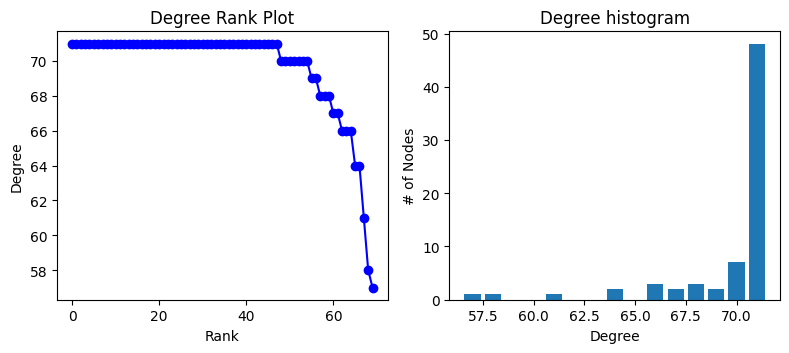

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 15.42it/s]


SpectralClustering(assign_labels='discretize', n_clusters=5, random_state=0)


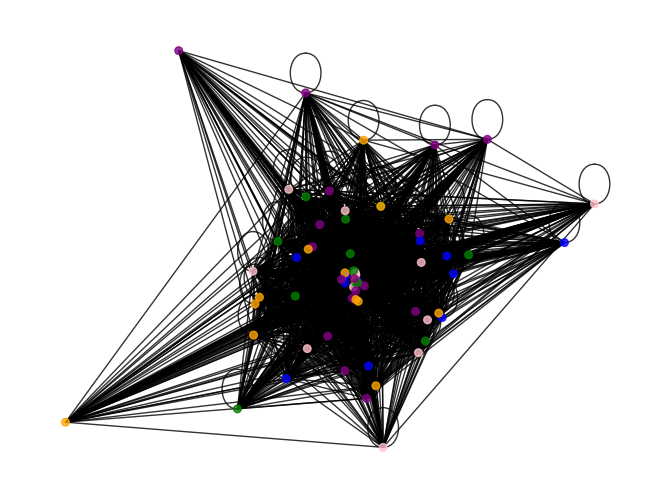

In [24]:
#https://medium.com/@preeti.chauhan8/learn-a-z-of-knowledge-graphs-part-6-shallow-graph-embeddings-node2vec-3a3f33bf72a7
#https://www.kaggle.com/datasets/Cornell-University/arxiv?resource=download data

#--- import relevant libs
import pandas as pd
import numpy as np

import json as json
import dask.bag as db

from itertools import combinations
from collections import Counter
from itertools import chain
import random

from sklearn.cluster import SpectralClustering
from node2vec import Node2Vec as n2v

from pathlib import Path

import matplotlib.pyplot as plt

import tensorflow as tf

import networkx as nx

import pyvis
from IPython.core.display import display, HTML
from pyvis import network as net
from pyvis.network import Network

#--- custom defined functions to be used later in the code

#--- flatten nested list
def flattenList(nested_list):
    flat_list = [item for sublist in nested_list for item in sublist]
    return flat_list

#----- removes up to n degree nodes and return the subgraph
def rmv_n_dgree_nodes(G,deg):
    # remove low-degree nodes
    low_degree = [n for n, d in G.degree() if d <= deg]
    low_degree_graph = G.remove_nodes_from(low_degree)
    return low_degree_graph

#--- degree analysis of the graph
def degree_analysis(G):
    #----1.) degree analysis
    print("Total nodes in the graph: ",len(G.nodes()))
    G_degree=G.degree()
    print("Average degree of graph is : ", np.mean([d for _, d in G_degree]))
    print("Max degree of graph is : ", np.max([d for _, d in G_degree]))

    print("Min degree of graph is : ", np.min([d for _, d in G_degree]))
            
    #----2.) plot degree distribution
        
    degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
    dmax = max(degree_sequence)
    fig = plt.figure("Degree of fb pages graph conected by likes", figsize=(8, 8))
    # Create a gridspec for adding subplots of different sizes
    axgrid = fig.add_gridspec(5, 4)

    ax1 = fig.add_subplot(axgrid[3:, :2])
    ax1.plot(degree_sequence, "b-", marker="o")
    ax1.set_title("Degree Rank Plot")
    ax1.set_ylabel("Degree")
    ax1.set_xlabel("Rank")

    ax2 = fig.add_subplot(axgrid[3:, 2:])
    ax2.bar(*np.unique(degree_sequence, return_counts=True))
    ax2.set_title("Degree histogram")
    ax2.set_xlabel("Degree")
    ax2.set_ylabel("# of Nodes")

    fig.tight_layout()
    plt.show()

#--- get immediate neighbourhood (node list) from a initial list of nodes with degree>= min_deg. 
#----You can modify it to get n level neighbourhood also!
def get_neighbourhood(G,target_nodes,min_deg=0):

    """This function takes a Graph and list of initial nodes. Returns the set of immediate neighbours of these nodes which is grater than degree provided"""
    total_neighbours=0
    nodes_set=[target_nodes]
    for node in target_nodes:
        #print(node)
        neighbours=list(G.neighbors(node))
        total_neighbours=total_neighbours+len(neighbours)     
        nodes_set.append(neighbours)
    print(total_neighbours)
    nodes_set=flattenList(nodes_set)
    
    #-- get the list of all nodes with lower degrees:
    if min_deg >0:
        low_degree = [n for n, d in G.degree() if d <= min_deg]
        #--- minus these low degree odes from nodes_set
        nodes_set = [x for x in nodes_set if x not in low_degree]
    
    return list(set(nodes_set))

#--- plot communities graph
#1:Betweennes
#2:Closeness
#3:Degree
#4:Igenvector
def plot_community():
    pass


#-- this function extract all the AI and ML papers from the 
def extractArxivData(categories=['stat.ML','cs.AI'],year=None,raw_data_path="/kaggle/input/arxiv/",save_extracted_filename="../data/processed/AI_ML.json"):
    """ This function extracts data for the given set of categories and
    save the data into the save_extracted_filename path """
    
    import os
    
    records=db.read_text(raw_data_path+"/*.json").map(lambda x:json.loads(x))
    docs = (records.filter(lambda x:any(ele in x['categories'] for ele in categories)==True))
    extract_latest_version=lambda x:x['versions'][-1]["created"]
    if year!=None:
        docs=docs.filter(lambda x:int(extract_latest_version(x).split(" ")[3])>=year)

    get_metadata = lambda x: {'id': x['id'],
                  'title': x['title'],
                  'category':x['categories'],
                  'abstract':x['abstract'],
                 'version':x['versions'][-1]['created'],
                         'doi':x["doi"],
                         'authors_parsed':x['authors_parsed']}
      
    print(f'get_metadata-typ:{type(get_metadata)}, get_metadata:{get_metadata}')
    data=docs.map(get_metadata).to_dataframe().compute()

    ## Creating authors fields by joining first and last nmes in authors_parsed columns.
    data['authors']=data['authors_parsed'].apply(lambda authors:[(" ".join(author)).strip() for author in authors])

    print("Number of Records Extracted for Given Set of Categories ",data.shape[0])
    Path(os.path.dirname(save_extracted_filename)).mkdir(parents=True, exist_ok=True)
    data.to_json(save_extracted_filename,orient="records")
    return data

#note: read json data using Dash to be explored

#---- load the data
# data_path = 'D:\\dataset\\graph\\ArxivMetaData\\'
# file_name = 'arxiv-metadata-oai-snapshot.json'

## Collect data for Papers published in ['stat.ML','cs.AI'] since year 2022.
#data=extractArxivData(categories=['stat.ML','cs.AI'],year=2022,raw_data_path=data_path,save_extracted_filename=data_path+"AI_ML_since2015.json"

# data = extractArxivData(categories=['stat.ML','cs.AI'], year=None, raw_data_path=data_path, save_extracted_filename=data_path+"AI_ML.json")
# data['author_pairs']=data['authors'].apply(lambda x:list(combinations(x, 2)))
# data.head()

data = df.copy()

data['author_pairs']=data['authors'].apply(lambda x:list(combinations(x, 2)))
data.head()

#take only the authors who have published more than 2 papers:

ai_authors=pd.DataFrame(flattenList(data['authors'].tolist())).rename(columns={0:'authors'})
papers_by_authors=ai_authors.groupby(['authors']).size().reset_index().rename(columns={0:'Number of Papers Published'}).sort_values("Number of Papers Published",ascending=False)

## Keeping Authors who have published more than 2 Papers
nodes_to_keep=papers_by_authors.loc[papers_by_authors['Number of Papers Published']>2,'authors'].tolist()
len(nodes_to_keep)

#--- generating edges of co-author network
authors_pairs=data['author_pairs'].tolist()
authors_edge_list=[item for sublist in authors_pairs for item in sublist]
authors_weighted_edge_list=list(Counter(authors_edge_list).items())
authors_weighted_edge_list=[(row[0][0],row[0][1],row[1]) for idx,row in enumerate(authors_weighted_edge_list)]
authors_weighted_edge_list[0:10]

#--- creatig the complete graph
G1=nx.Graph()
G1.add_weighted_edges_from(authors_weighted_edge_list)
print(len(G1.nodes()))

#---Filtering the Graph, to keep nodes (authors) who have atleast published 3 papers. We will also remove any isolated nodes in the generated network
## From the complete Graph, create a subgraph, with only the nodes to keep
sub_g=nx.subgraph(G1,nodes_to_keep)
G=nx.Graph(sub_g)
print(len(G.nodes()))
isolated_node=nx.isolates(G)
len(list(isolated_node))

#---remove the isolated nodes
G.remove_nodes_from(list(nx.isolates(G)))
len(G.nodes)

#--- degree analysis of graph
degree_analysis(G)

#Apply node2vec :

#----Apply node2vec to generate embeddings

WINDOW = 1 # Node2Vec fit window
MIN_COUNT = 1 # Node2Vec min. count
BATCH_WORDS = 4 # Node2Vec batch words

g_emb = n2v(
  G,
  dimensions=16
)

mdl = g_emb.fit(
    vector_size = 16,
    window=WINDOW,
    min_count=MIN_COUNT,
    batch_words=BATCH_WORDS
)

emb_df = (
    pd.DataFrame(
        [mdl.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

#--- save the embedding df
#emb_df.to_pickle("../working/embeddings.pkl")
emb_df.to_pickle(data_path+"embeddings.pkl")
#emb_df=pd.read_pickle("/kaggle/working/embeddings.pkl")

#Apply clustering: We can find appropriate number of cluster by elbow method or silhouette
X = emb_df.values

#---clustering on embeddings
clustering = SpectralClustering(
    n_clusters=5, 
    assign_labels='discretize',
    random_state=0
).fit(X)

print(clustering)

#plot clusters:
#---plot the detected communities

comm_dct = dict(zip(emb_df.index, clustering.labels_))

unique_coms = np.unique(list(comm_dct.values()))
cmap = {
    0 : 'pink',
    1 : 'blue',
    2 : 'purple', 
    3 : 'orange',
    4 : 'green',
}

node_cmap = [cmap[v] for _,v in comm_dct.items()]

pos = nx.spring_layout(G)
nx.draw(G, pos, node_size = 30, alpha = 0.8, node_color=node_cmap)
plt.show()

In [18]:
ai_authors

,authors
0,R
1,a
2,f
3,a
4,e
...,...
109782,g
109783,
109784,Y
109785,a


In [ ]:
#v1.2 /Aug08,2023
def spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "DATE",
                records_groupby_id = None, ent_plot_filter = None, threeD_plot = True,
                pos_layout = 'circular_layout', plot_save_path=None):

    '''
    1.2 Aug08,2023 updated for 3D plot/pos for draw
    1.1 May12,2023 added records_groupby_id option/ used to group records like chat @ user is level
    1.0 May03,2023 initial version

    plot_save_path: if not none then it will create Network Graph
    ent_type = NUMERIC, PERSON, ORG, LOC, NUMERIC, DATE
    
    draw methods >>
     'draw',
     'draw_circular',
     'draw_kamada_kawai',
     'draw_networkx',
     'draw_planar',
     'draw_random',
     'draw_shell',
     'draw_spectral',
     'draw_spring',
    '''

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    import spacy 
    import textacy  #0.12.0
    import networkx as nx  #3.0 (also pygraphviz==1.10)
    import dateparser #1.1.7
    

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text_data)

    #3 from text to a list of sentences
    lst_docs = [sent for sent in doc.sents]

    dic_sub_vrb_obj = {"id":[], "text":[], "sub":[], "relation":[], "object":[]}
    dic_ent = {"id":[], "text":[], ent_type:[]}
    dic_all_ent = {"id":[], "text":[], 'all_ent':[]}
    dic_all_noun = {"id":[], "text":[], 'noun':[]}

    for n, sentence in enumerate(lst_docs):
        #print(f'\n sentence no:{n}, sentence:{sentence}')
        lst_sub_vrb_obj = list(textacy.extract.subject_verb_object_triples(sentence))
        lst_ent = list(textacy.extract.entities(sentence, include_types={ent_type}))
        lst_all_ent = list(textacy.extract.entities(sentence))
        lst_all_noun = list(textacy.extract.noun_chunks(sentence))
        list_all_tokens = list(textacy.extract.words(sentence))

        #1 lst_ent
        if len(lst_ent) > 0:
            for attr in lst_ent:
                dic_ent["id"].append(n)
                dic_ent["text"].append(sentence.text)
                dic_ent[ent_type].append(str(attr))
        else:
            dic_ent["id"].append(n)
            dic_ent["text"].append(sentence.text)
            dic_ent[ent_type].append(np.nan)

        dtf_ent = pd.DataFrame(dic_ent)

        #2 lst_all_ent
        if len(lst_all_ent) > 0:
            for attr1 in lst_all_ent:
                dic_all_ent["id"].append(n)
                dic_all_ent["text"].append(sentence.text)
                dic_all_ent['all_ent'].append(str(attr1))
        else:
            dic_all_ent["id"].append(n)
            dic_all_ent["text"].append(sentence.text)
            dic_all_ent['all_ent'].append(np.nan)

        dtf_all_ent = pd.DataFrame(dic_all_ent)
        if records_groupby_id:
            dtf_all_ent = dtf_all_ent.groupby(records_groupby_id).agg(lambda x: list(x)).reset_index()

        #3 lst_sub_vrb_obj
        if len(lst_sub_vrb_obj) > 0:
            for m, sent in enumerate(lst_sub_vrb_obj): #one sentence can have more than 1 one sub/verb/obj
                subj = "_".join(map(str, sent.subject))
                obj  = "_".join(map(str, sent.object))
                relation = "_".join(map(str, sent.verb))
                dic_sub_vrb_obj["id"].append(n)
                dic_sub_vrb_obj["text"].append(sentence.text)
                dic_sub_vrb_obj["sub"].append(subj)
                dic_sub_vrb_obj["object"].append(obj)
                dic_sub_vrb_obj["relation"].append(relation)
        else:
            dic_sub_vrb_obj["id"].append(n)
            dic_sub_vrb_obj["text"].append(sentence.text)
            dic_sub_vrb_obj["sub"].append(np.nan)
            dic_sub_vrb_obj["object"].append(np.nan)
            dic_sub_vrb_obj["relation"].append(np.nan)

        dtf_sub_vrb_obj = pd.DataFrame(dic_sub_vrb_obj)

        #4 lst_all_noun
        if len(lst_all_noun) > 0:
            for attr1 in lst_all_noun:
                dic_all_noun["id"].append(n)
                dic_all_noun["text"].append(sentence.text)
                dic_all_noun['noun'].append(str(attr1))
        else:
            dic_all_noun["id"].append(n)
            dic_all_noun["text"].append(sentence.text)
            dic_all_noun['all_ent'].append(np.nan)

        dtf_all_noun = pd.DataFrame(dic_all_noun)
        dtf_all_noun = dtf_all_noun.groupby('id').agg(lambda x: list(x)).reset_index()

    # merge the all files
    dtf_final = dtf_sub_vrb_obj.merge(dtf_ent[[ent_type, 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_ent[['all_ent', 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_noun[['noun', 'id']], how="left", on="id")

    if plot_save_path:
        if ent_plot_filter:
            dtf_final = dtf_final[(dtf_final["sub"]==ent_plot_filter) | (dtf_final["object"]==ent_plot_filter)]

        ## create full graph
        G = nx.from_pandas_edgelist(dtf_final, source="sub", target="object", 
                                    edge_attr="relation", create_using=nx.DiGraph())
        
        #chk pos_layout /TBC
#         if pos_layout == 'circular_layout':
#             pos=nx.circular_layout(G, k=1)
#         elif pos_layout == 'spectral_layout':
#             pos=nx.spectral_layout(G, k=1)
#         elif pos_layout == 'spring_layout':
#             pos=nx.spring_layout(G, k=1)
            
        pos = nx.spring_layout(G, k=1)
            
        ## plot
        plt.figure(figsize=(15,10))

        node_color = "skyblue"
        edge_color = "black"

        nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
                edge_color=edge_color, cmap=plt.cm.Dark2, 
                node_size=2000, connectionstyle='arc3,rad=0.1')

        nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                                 edge_labels=nx.get_edge_attributes(G,'relation'),
                                 font_size=12, font_color='black', alpha=0.6)
        plt.show()
        plt.savefig(plot_save_path+'EntityKnowledgeGraph.png')
        
    if threeD_plot: #1.2
        f = ent_plot_filter
        fig = plt.figure(figsize=(15,10))
        ax = fig.add_subplot(111, projection="3d")
        pos = nx.spring_layout(G, k=2.5, dim=3)

        nodes = np.array([pos[v] for v in sorted(G) if v!=f])
        center_node = np.array([pos[v] for v in sorted(G) if v==f])

        edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v!=f])
        center_edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v==f])

        ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
        ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

        for link in edges:
            ax.plot(*link.T, color="grey", lw=0.5)
        for link in center_edges:
            ax.plot(*link.T, color="red", lw=0.5)

        for v in sorted(G):
            ax.text(*pos[v].T, s=v)
        for u,v in G.edges():
            attr = nx.get_edge_attributes(G, "relation")[(u,v)]
            ax.text(*((pos[u]+pos[v])/2).T, s=attr)

        ax.set(xlabel=None, ylabel=None, zlabel=None, 
               xticklabels=[], yticklabels=[], zticklabels=[])
        ax.grid(False)
        for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
            dim.set_ticks([])
        plt.show()
        plt.savefig(plot_save_path+'EntityKnowledgeGraph3D.png')

    return dtf_final, G

# at user chat level
import pandas as pd
data_path = 'D:\\projects\\CAI\\'
plot_save_path = 'D:\\projects\\CAI\\'

# file_name = 'User_Journey.xlsx'
# df = pd.read_excel(data_path+file_name, sheet_name='Chat_dummy')
# df['chat'] = df['chat'].astype('object')
# text_data = ','.join([str(i) for i in df['chat'].values.tolist()])

df = pd.read_excel(data_path+'User_Journey.xlsx', sheet_name ='ChatRawData')

text_col = 'utterance'
target_col = 'sentiment'

df = df.loc[df.utterance.notnull()][[text_col]]
df[text_col] = df[text_col].apply(lambda x: str(x))
df.reset_index(inplace=True, drop=True)

df = df.head(100)
text_data = ','.join([str(i) for i in df[text_col].values.tolist()])

## filter
ent_plot_filter = 'I'

dtf_final, G = spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "DATE",
        records_groupby_id = None, ent_plot_filter = ent_plot_filter, plot_save_path=plot_save_path)

dtf_final.head()

In [ ]:
import networkx as nx
#max(nx.eccentricity(G, sp=shortest_path_lengths).values())
#max(nx.eccentricity(G))
import gzip
#nx.has_bridges(G)
import tensorflow as tf
get_all_centralities(G)

In [ ]:
#import tensorflow as tf
#!pip install tensorflow

import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [ ]:
import networkx as nx

# No. of edges and nodes
print("# nodes:", len(G.nodes()))
print("# edges:", len(G.edges()))
print('edges:', G.edges)
print('nodes:', G.nodes)

# Let's see first 10 edges and nodes
edges= G.edges()
nodes= G.nodes()
print("first 10 edges: ",list(edges)[0:10])
print("first 10 nodes: ",list(nodes)[0:10])

# graph connectivity
import networkx.algorithms.components as nx_comp

# if nx_comp.is_connected(G):
#     print("This is a connected graph!")
#     print("# connected components: ",nx_comp.number_connected_components(G))
#     print("List of connected components: ", nx_comp.connected_components(G))
# else:
#     print("Not connected graph!")

# directed graph connectivity
import networkx.algorithms.components as nx_comp

if nx_comp.is_strongly_connected(G):
    print("\n This is a strongly connected graph!")
    print("# strongly connected components: ",nx_comp.number_strongly_connected_components(G))
    print("List of strongly connected components: ", nx_comp.strongly_connected_components(G))
elif nx_comp.is_weakly_connected(G):
    print("\n This is a weakly connected graph!")
    print("# weakly connected components: ",nx_comp.number_weakly_connected_components(G))
    print("List of weakly connected components: ", nx_comp.weakly_connected_components(G))
elif nx_comp.is_semiconnected(G):
    print("\n This is a semi-connected graph!")
else:
    print("Not connected graph!")
    
# graph views - subgraph
import networkx.classes.graphviews as nx_grphvw
#--- create subgraph view with nodes ids < 11
def filter_node(n1):
    #return n1 < 11
    return n1

view = nx.subgraph_view(G, filter_node=filter_node)
print('subgraph_view:', view.nodes())

#-- draw normal view
#nx.draw(view)

#-- draw view with 10 nodes and more added atrributes
#nx.draw(view, with_labels=True, pos=nx.circular_layout(view), node_color="red", node_size=100, edge_color='blue')

#-- draw view with 10000 nodes, spectral_layout
#nx.draw(view, with_labels=True, pos=nx.spectral_layout(view), node_color="red", node_size=100, edge_color='blue', font_size=4)
nx.draw(G, with_labels=True, pos=nx.spectral_layout(view), node_color="red", node_size=100, edge_color='blue', font_size=4)


# spring_layout
from matplotlib import pyplot as plt
pos = nx.spring_layout(G, k=1)
node_color = "skyblue"
edge_color = "black"
        
nx.draw(G, pos=pos, with_labels=True, node_color=node_color, edge_color=edge_color, cmap=plt.cm.Dark2, 
                node_size=2000, connectionstyle='arc3,rad=0.1')

#Page Rank of the nodes in graph
pr = nx.pagerank(G, alpha=0.9)
print('\nPage Rank of the nodes:', pr)

In [ ]:
#Page Rank of the nodes in graph
pr = nx.pagerank(G, alpha=0.9)
print(pr)

In [ ]:
# nx.draw_networkx_edge_labels(G,  with_labels=True, node_color=node_color, edge_color=edge_color, cmap=plt.cm.Dark2, 
#                 node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx(G, edge_color=edge_color, cmap=plt.cm.Dark2, 
                node_size=2000, connectionstyle='arc3,rad=0.1')

In [ ]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
dmax
degree_sequence

In [ ]:
#-- Let's explore the degree of the nodes and plot 'degree rank plot' and 'degree histogram'
#with tf.device('/GPU:0'):

degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)
fig = plt.figure("Degree of amazon co-purchased prdct graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)
ax0 = fig.add_subplot(axgrid[0:3, :])
# Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
# pos = nx.spring_layout(Gcc, seed=10396953)
# nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
# nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
# ax0.set_title("Connected components of G")
# ax0.set_axis_off()
# ax1 = fig.add_subplot(axgrid[3:, :2])
# ax1.plot(degree_sequence, "b-", marker="o")
# ax1.set_title("Degree Rank Plot")
# ax1.set_ylabel("Degree")
# ax1.set_xlabel("Rank")
# ax2 = fig.add_subplot(axgrid[3:, 2:])
# ax2.bar(*np.unique(degree_sequence, return_counts=True))
# ax2.set_title("Degree histogram")
# ax2.set_xlabel("Degree")
# ax2.set_ylabel("# of Nodes")
# fig.tight_layout()
# plt.show()

In [ ]:
dir(nx_comp)
dir(nx)

In [ ]:
import networkx as nx

def get_strongly_cc(G, node):
    """ get storngly connected component of node""" 
    for cc in nx.strongly_connected_components(G):
        if node in cc:
            return cc
    else:
        return set()

def get_weakly_cc(G, node):
    """ get weakly connected component of node""" 
    for cc in nx.weakly_connected_components(G):
        if node in cc:
            return cc
    else:
        return set()

edges= G.edges()
nodes= G.nodes()

# weak_component = get_weakly_cc(G, nodes)  # Weakly connected component of node in G
# strong_component = get_strongly_cc(G, nodes)  # Strongly connected component of node in G

In [ ]:
dtf_final['DATE'].value_counts()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import networkx as nx
import numpy as np

f = ent_plot_filter
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3d")
pos = nx.spring_layout(G, k=2.5, dim=3)

nodes = np.array([pos[v] for v in sorted(G) if v!=f])
center_node = np.array([pos[v] for v in sorted(G) if v==f])

edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v!=f])
center_edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v==f])

ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

for link in edges:
    ax.plot(*link.T, color="grey", lw=0.5)
for link in center_edges:
    ax.plot(*link.T, color="red", lw=0.5)
    
for v in sorted(G):
    ax.text(*pos[v].T, s=v)
for u,v in G.edges():
    attr = nx.get_edge_attributes(G, "relation")[(u,v)]
    ax.text(*((pos[u]+pos[v])/2).T, s=attr)

ax.set(xlabel=None, ylabel=None, zlabel=None, 
       xticklabels=[], yticklabels=[], zticklabels=[])
ax.grid(False)
for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
    dim.set_ticks([])
plt.show()

In [ ]:
#v1.1 /May12,2023
def spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "DATE",
                records_groupby_id = None, ent_plot_filter = None, plot_save_path=None):

    '''
    1.1 May12,2023 added records_groupby_id option/ used to group records like chat @ user is level
    1.0 May03,2023 initial version

    plot_save_path: if not none then it will create Network Graph
    ent_type = NUMERIC, PERSON, ORG, LOC, NUMERIC, DATE
    '''

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt

    import spacy 
    import textacy  #0.12.0
    import networkx as nx  #3.0 (also pygraphviz==1.10)
    import dateparser #1.1.7
    

    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text_data)

    #3 from text to a list of sentences
    lst_docs = [sent for sent in doc.sents]

    dic_sub_vrb_obj = {"id":[], "text":[], "sub":[], "relation":[], "object":[]}
    dic_ent = {"id":[], "text":[], ent_type:[]}
    dic_all_ent = {"id":[], "text":[], 'all_ent':[]}
    dic_all_noun = {"id":[], "text":[], 'noun':[]}

    for n, sentence in enumerate(lst_docs):
        #print(f'\n sentence no:{n}, sentence:{sentence}')
        lst_sub_vrb_obj = list(textacy.extract.subject_verb_object_triples(sentence))
        lst_ent = list(textacy.extract.entities(sentence, include_types={ent_type}))
        lst_all_ent = list(textacy.extract.entities(sentence))
        lst_all_noun = list(textacy.extract.noun_chunks(sentence))
        list_all_tokens = list(textacy.extract.words(sentence))

        #1 lst_ent
        if len(lst_ent) > 0:
            for attr in lst_ent:
                dic_ent["id"].append(n)
                dic_ent["text"].append(sentence.text)
                dic_ent[ent_type].append(str(attr))
        else:
            dic_ent["id"].append(n)
            dic_ent["text"].append(sentence.text)
            dic_ent[ent_type].append(np.nan)

        dtf_ent = pd.DataFrame(dic_ent)

        #2 lst_all_ent
        if len(lst_all_ent) > 0:
            for attr1 in lst_all_ent:
                dic_all_ent["id"].append(n)
                dic_all_ent["text"].append(sentence.text)
                dic_all_ent['all_ent'].append(str(attr1))
        else:
            dic_all_ent["id"].append(n)
            dic_all_ent["text"].append(sentence.text)
            dic_all_ent['all_ent'].append(np.nan)

        dtf_all_ent = pd.DataFrame(dic_all_ent)
        if records_groupby_id:
            dtf_all_ent = dtf_all_ent.groupby(records_groupby_id).agg(lambda x: list(x)).reset_index()

        #3 lst_sub_vrb_obj
        if len(lst_sub_vrb_obj) > 0:
            for m, sent in enumerate(lst_sub_vrb_obj): #one sentence can have more than 1 one sub/verb/obj
                subj = "_".join(map(str, sent.subject))
                obj  = "_".join(map(str, sent.object))
                relation = "_".join(map(str, sent.verb))
                dic_sub_vrb_obj["id"].append(n)
                dic_sub_vrb_obj["text"].append(sentence.text)
                dic_sub_vrb_obj["sub"].append(subj)
                dic_sub_vrb_obj["object"].append(obj)
                dic_sub_vrb_obj["relation"].append(relation)
        else:
            dic_sub_vrb_obj["id"].append(n)
            dic_sub_vrb_obj["text"].append(sentence.text)
            dic_sub_vrb_obj["sub"].append(np.nan)
            dic_sub_vrb_obj["object"].append(np.nan)
            dic_sub_vrb_obj["relation"].append(np.nan)

        dtf_sub_vrb_obj = pd.DataFrame(dic_sub_vrb_obj)

        #4 lst_all_noun
        if len(lst_all_noun) > 0:
            for attr1 in lst_all_noun:
                dic_all_noun["id"].append(n)
                dic_all_noun["text"].append(sentence.text)
                dic_all_noun['noun'].append(str(attr1))
        else:
            dic_all_noun["id"].append(n)
            dic_all_noun["text"].append(sentence.text)
            dic_all_noun['all_ent'].append(np.nan)

        dtf_all_noun = pd.DataFrame(dic_all_noun)
        dtf_all_noun = dtf_all_noun.groupby('id').agg(lambda x: list(x)).reset_index()

    # merge the all files
    dtf_final = dtf_sub_vrb_obj.merge(dtf_ent[[ent_type, 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_ent[['all_ent', 'id']], how="left", on="id")
    dtf_final = dtf_final.merge(dtf_all_noun[['noun', 'id']], how="left", on="id")

    if plot_save_path:
        if ent_plot_filter:
            dtf_final = dtf_final[(dtf_final["sub"]==ent_plot_filter) | (dtf_final["object"]==ent_plot_filter)]

        ## create full graph
        G = nx.from_pandas_edgelist(dtf_final, source="sub", target="object", 
                                    edge_attr="relation", create_using=nx.DiGraph())
        ## plot
        plt.figure(figsize=(15,10))

        pos = nx.spring_layout(G, k=1)
        node_color = "skyblue"
        edge_color = "black"

        nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
                edge_color=edge_color, cmap=plt.cm.Dark2, 
                node_size=2000, connectionstyle='arc3,rad=0.1')

        nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                                 edge_labels=nx.get_edge_attributes(G,'relation'),
                                 font_size=12, font_color='black', alpha=0.6)
        plt.show()
        plt.savefig(plot_save_path+'EntityKnowledgeGraph.png')

    return dtf_final

# at user chat level
import pandas as pd
data_path = 'D:\\projects\\CAI\\'
plot_save_path = 'D:\\projects\\CAI\\'

# file_name = 'User_Journey.xlsx'
# df = pd.read_excel(data_path+file_name, sheet_name='Chat_dummy')
# df['chat'] = df['chat'].astype('object')
# text_data = ','.join([str(i) for i in df['chat'].values.tolist()])

df = pd.read_excel(data_path+'User_Journey.xlsx', sheet_name ='ChatRawData')

text_col = 'utterance'
target_col = 'sentiment'

df = df.loc[df.utterance.notnull()][[text_col]]
df[text_col] = df[text_col].apply(lambda x: str(x))
df.reset_index(inplace=True, drop=True)

df = df.head(100)
text_data = ','.join([str(i) for i in df[text_col].values.tolist()])

## filter
ent_plot_filter = 'I'

dtf_final = spacy_textacy_entity_extraction_knowlege_graph(text_data, ent_type = "DATE",
        records_groupby_id = None, ent_plot_filter = ent_plot_filter, plot_save_path=plot_save_path)

dtf_final.head()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
text_data
dtf_final

In [ ]:
text_data

C:\Users\ajverma\AppData\Local\anaconda3\envs\tensorflow\lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


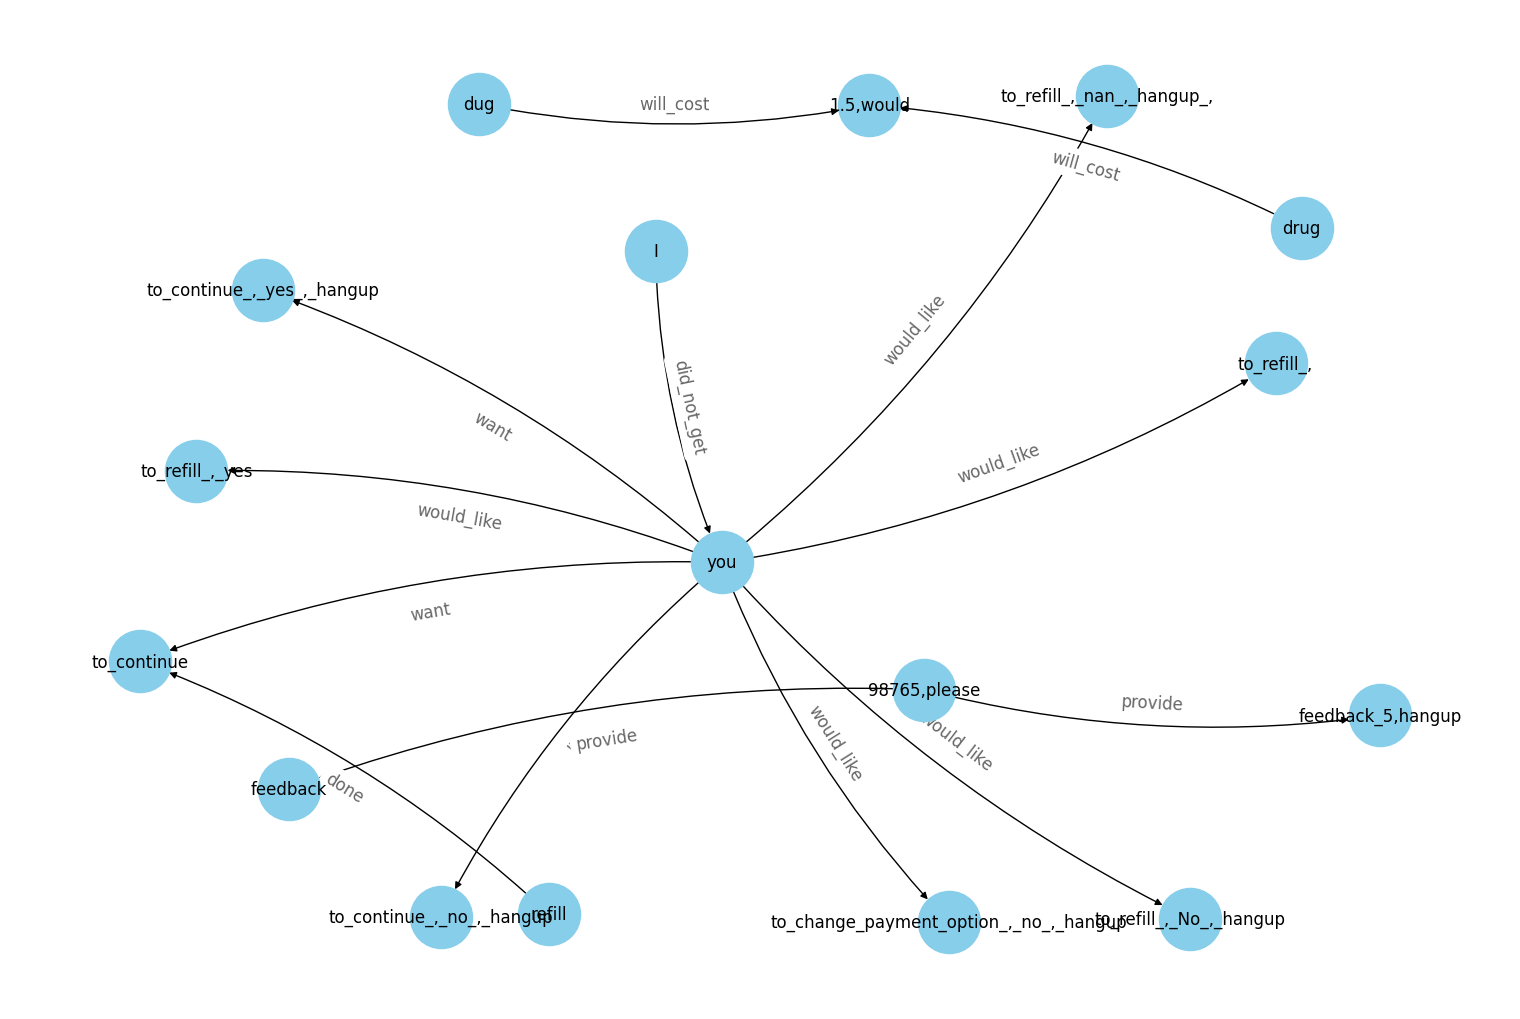

,id,text,sub,relation,object,NUMERIC,all_ent,noun
0,0,"Hi this is BotA,welcome to XYZ,Please provide ...",you,would_like,"to_refill_,_yes","1.5,would","[XYZ,Please, DOB, ABC, 1.5,would, 1234567]","[this, BotA,welcome, XYZ, DOB, format, -dd,199..."
1,0,"Hi this is BotA,welcome to XYZ,Please provide ...",you,would_like,"to_refill_,_yes",1234567,"[XYZ,Please, DOB, ABC, 1.5,would, 1234567]","[this, BotA,welcome, XYZ, DOB, format, -dd,199..."
2,0,"Hi this is BotA,welcome to XYZ,Please provide ...",drug,will_cost,"1.5,would","1.5,would","[XYZ,Please, DOB, ABC, 1.5,would, 1234567]","[this, BotA,welcome, XYZ, DOB, format, -dd,199..."
3,0,"Hi this is BotA,welcome to XYZ,Please provide ...",drug,will_cost,"1.5,would",1234567,"[XYZ,Please, DOB, ABC, 1.5,would, 1234567]","[this, BotA,welcome, XYZ, DOB, format, -dd,199..."
4,0,"Hi this is BotA,welcome to XYZ,Please provide ...",you,like,to_continue,"1.5,would","[XYZ,Please, DOB, ABC, 1.5,would, 1234567]","[this, BotA,welcome, XYZ, DOB, format, -dd,199..."
...,...,...,...,...,...,...,...,...
383,2,"I did not get,Please provide DOB in format yyy...",refill,done,to_continue,"1.5,would","[DOB, XYZ,Please, DOB, ABC, XYZ,Please, DOB, A...","[I, DOB, format, -dd,1999, 12-25 00:00:00,hang..."
384,2,"I did not get,Please provide DOB in format yyy...",refill,done,to_continue,"1.5,would","[DOB, XYZ,Please, DOB, ABC, XYZ,Please, DOB, A...","[I, DOB, format, -dd,1999, 12-25 00:00:00,hang..."
385,2,"I did not get,Please provide DOB in format yyy...",refill,done,to_continue,"1.5,would","[DOB, XYZ,Please, DOB, ABC, XYZ,Please, DOB, A...","[I, DOB, format, -dd,1999, 12-25 00:00:00,hang..."
386,2,"I did not get,Please provide DOB in format yyy...",refill,done,to_continue,1234567,"[DOB, XYZ,Please, DOB, ABC, XYZ,Please, DOB, A...","[I, DOB, format, -dd,1999, 12-25 00:00:00,hang..."


In [5]:
# topic = "Russo-Ukrainian War"

# import wikipediaapi
# wiki = wikipediaapi.Wikipedia('en')
# page = wiki.page(topic)
# txt = page.text[:page.text.find("See also")]

data_path = 'D:\\dataset\\'
file_name = 'User_Journey.xlsx'
df = pd.read_excel(data_path+file_name, sheet_name='Chat_dummy')
df['chat'] = df['chat'].astype('object')
text_data = ','.join([str(i) for i in df['chat'].values.tolist()])

ent_type = "DATE"; plot=True; ent_plot_filter = None
#ent_plot_filter = 'drug'
ent_type = 'NUMERIC' #PERSON, ORG, LOC, NUMERIC, DATE

#text_data = ''' i m going to office. i  m going to house '''

import pandas as pd

import spacy 
import textacy  #0.12.0
import networkx as nx  #3.0 (also pygraphviz==1.10)
import dateparser #1.1.7
import pandas as pd
import numpy as np

nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)

#3 from text to a list of sentences
lst_docs = [sent for sent in doc.sents]

dic_sub_vrb_obj = {"id":[], "text":[], "sub":[], "relation":[], "object":[]}
dic_ent = {"id":[], "text":[], ent_type:[]}
dic_all_ent = {"id":[], "text":[], 'all_ent':[]}
dic_all_noun = {"id":[], "text":[], 'noun':[]}

for n, sentence in enumerate(lst_docs):
    #print(f'\n sentence no:{n}, sentence:{sentence}')
    lst_sub_vrb_obj = list(textacy.extract.subject_verb_object_triples(sentence))
    lst_ent = list(textacy.extract.entities(sentence, include_types={ent_type}))
    lst_all_ent = list(textacy.extract.entities(sentence))
    lst_all_noun = list(textacy.extract.noun_chunks(sentence))
    list_all_tokens = list(textacy.extract.words(sentence))

    #1 lst_ent
    if len(lst_ent) > 0:
        for attr in lst_ent:
            dic_ent["id"].append(n)
            dic_ent["text"].append(sentence.text)
            dic_ent[ent_type].append(str(attr))
    else:
        dic_ent["id"].append(n)
        dic_ent["text"].append(sentence.text)
        dic_ent[ent_type].append(np.nan)
        
    dtf_ent = pd.DataFrame(dic_ent)
    
    #2 lst_all_ent
    if len(lst_all_ent) > 0:
        for attr1 in lst_all_ent:
            dic_all_ent["id"].append(n)
            dic_all_ent["text"].append(sentence.text)
            dic_all_ent['all_ent'].append(str(attr1))
    else:
        dic_all_ent["id"].append(n)
        dic_all_ent["text"].append(sentence.text)
        dic_all_ent['all_ent'].append(np.nan)
        
    dtf_all_ent = pd.DataFrame(dic_all_ent)
    dtf_all_ent = dtf_all_ent.groupby('id').agg(lambda x: list(x)).reset_index()

    #3 lst_sub_vrb_obj
    if len(lst_sub_vrb_obj) > 0:
        for m, sent in enumerate(lst_sub_vrb_obj): #one sentence can have more than 1 one sub/verb/obj
            subj = "_".join(map(str, sent.subject))
            obj  = "_".join(map(str, sent.object))
            relation = "_".join(map(str, sent.verb))
            dic_sub_vrb_obj["id"].append(n)
            dic_sub_vrb_obj["text"].append(sentence.text)
            dic_sub_vrb_obj["sub"].append(subj)
            dic_sub_vrb_obj["object"].append(obj)
            dic_sub_vrb_obj["relation"].append(relation)
    else:
        dic_sub_vrb_obj["id"].append(n)
        dic_sub_vrb_obj["text"].append(sentence.text)
        dic_sub_vrb_obj["sub"].append(np.nan)
        dic_sub_vrb_obj["object"].append(np.nan)
        dic_sub_vrb_obj["relation"].append(np.nan)
        
    dtf_sub_vrb_obj = pd.DataFrame(dic_sub_vrb_obj)
    
    #4 lst_all_noun
    if len(lst_all_noun) > 0:
        for attr1 in lst_all_noun:
            dic_all_noun["id"].append(n)
            dic_all_noun["text"].append(sentence.text)
            dic_all_noun['noun'].append(str(attr1))
    else:
        dic_all_noun["id"].append(n)
        dic_all_noun["text"].append(sentence.text)
        dic_all_noun['all_ent'].append(np.nan)
        
    dtf_all_noun = pd.DataFrame(dic_all_noun)
    dtf_all_noun = dtf_all_noun.groupby('id').agg(lambda x: list(x)).reset_index()
    
# merge the all files
dtf_final = dtf_sub_vrb_obj.merge(dtf_ent[[ent_type, 'id']], how="left", on="id")
dtf_final = dtf_final.merge(dtf_all_ent[['all_ent', 'id']], how="left", on="id")
dtf_final = dtf_final.merge(dtf_all_noun[['noun', 'id']], how="left", on="id")

if plot:
    if ent_plot_filter:
        dtf_final = dtf_final[(dtf_final["sub"]==ent_plot_filter) | (dtf_final["object"]==ent_plot_filter)]
        
    ## create full graph
    G = nx.from_pandas_edgelist(dtf_final, source="sub", target="object", 
                                edge_attr="relation", create_using=nx.DiGraph())
    ## plot
    plt.figure(figsize=(15,10))

    pos = nx.spring_layout(G, k=1)
    node_color = "skyblue"
    edge_color = "black"

    nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
            edge_color=edge_color, cmap=plt.cm.Dark2, 
            node_size=2000, connectionstyle='arc3,rad=0.1')

    nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                             edge_labels=nx.get_edge_attributes(G,'relation'),
                             font_size=12, font_color='black', alpha=0.6)
    plt.show()
    
    
dtf_final

In [6]:
text_data

'Hi this is BotA,welcome to XYZ,Please provide DOB in format yyyy-mm-dd,1999-12-25 00:00:00,you have drug ABC to refill,would you like to refill,yes,your drug will cost $1.5,would you like to continue,yes,you will be charged on your master card 1234567, want to continue,yes,your refill done successfully, your order no is 98765,please provide feedback in between 1-5,4,Hi this is BotA,welcome to XYZ,Please provide DOB in format yyyy-mm-dd,1999-12-25 00:00:00,sorry I did not get,Please provide DOB in format yyyy-mm-dd,1999-12-25 00:00:00,hangup,Hi this is BotA,welcome to XYZ,Please provide DOB in format yyyy-mm-dd,1999-12-25 00:00:00,you have drug ABC to refill,would you like to refill,No,hangup,Hi this is BotA,welcome to XYZ,Please provide DOB in format yyyy-mm-dd,1999-12-25 00:00:00,you have drug ABC to refill,would you like to refill,yes,your drug will cost $1.5,would you like to continue,no,hangup,Hi this is BotA,welcome to XYZ,Please provide DOB in format yyyy-mm-dd,1999-12-25 00:00:

In [ ]:
# testing knowledge graph

## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2

## for text
import wikipediaapi  #0.5.8
import nltk  #3.8.1
import re   

## for nlp
import spacy  #3.5.0
from spacy import displacy
import textacy  #0.12.0

## for graph
import networkx as nx  #3.0 (also pygraphviz==1.10)

## for timeline
import dateparser #1.1.7

#1 text from wikipedia
topic = "Russo-Ukrainian War"

wiki = wikipediaapi.Wikipedia('en')
page = wiki.page(topic)
txt = page.text[:page.text.find("See also")]
txt[0:500] + " ..."

txt = txt[0:996] # reduce the size
#2 spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(txt)

#3 from text to a list of sentences
lst_docs = [sent for sent in doc.sents]
#print("#3 tot sentences:", len(lst_docs))
print(f'#3 len-docs:{len(lst_docs)}, lst_docs:{lst_docs}')

#4 extract entities and their relation, Part-of-Speech (POS) tagging/Dependency (DEP) parsing
# take a sentence
i = 3
# lst_docs[i]
print('\n #4 lst_docs-sentence:', lst_docs[i])

print('#4 lst_docs-POS/DEP>>')
for token in lst_docs[i]:
    print(token.text, "-->", "pos: "+token.pos_, "|", "dep: "+token.dep_, "")
    
#5 SpaCy provides also a graphic tool to visualize those annotations:
from spacy import displacy
#displacy.render(lst_docs[i], style="dep", options={"distance":100})

#6 Named Entity Recognition (NER) 
print('\n #6 Named Entity Recognition (NER)>>')
for tag in lst_docs[i].ents:
    print(tag.text, f"({tag.label_})")
    
#9 Alternatively Textacy, a library built on top of SpaCy for extending its core functionalities.
print('\n #9.1 extract entities and relations in tabular form df using Textacy')
dic = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n, sentence in enumerate(lst_docs):
    print(f'\n sentence no:{n}, sentence:{sentence}')
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))
    print(f'lst_generators-len:{len(lst_generators)}, lst_generators:{lst_generators}')
    
    #for sent in lst_generators:
    for m, sent in enumerate(lst_generators): #one sentence can have more than 1 one sub/verb/obj
        print(f'sentence no:{n}, sent no:{m}, sent:{sent}')
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["entity"].append(subj)
        dic["object"].append(obj)
        dic["relation"].append(relation)
        print(f'sentence no:{n}, sent no:{m}, dic:{dic}')

print('9.1 extract entities and relations-dict-final:', dic)
## create dataframe
dtf = pd.DataFrame(dic)
print('before id dtf:', dtf)
dtf[dtf["id"]==i]
print('after id dtf:', dtf)

print('\n #9.2 attributes using NER tags (i.e. dates):')
attribute = "DATE"
dic = {"id":[], "text":[], attribute:[]}

for n, sentence in enumerate(lst_docs):
    lst = list(textacy.extract.entities(sentence, include_types={attribute}))
    if len(lst) > 0:
        for attr in lst:
            dic["id"].append(n)
            dic["text"].append(sentence.text)
            dic[attribute].append(str(attr))
    else:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic[attribute].append(np.nan)

dtf_att = pd.DataFrame(dic)
dtf_att = dtf_att[~dtf_att[attribute].isna()]

dtf_att[dtf_att["id"]==i]
print('#9.2 attributes using NER tags in tabular form df using Textacy:', dtf_att)

In [ ]:
def nlp_extract_entity_dep_df(data):
    

In [ ]:
#https://medium.com/towards-data-science/nlp-with-python-knowledge-graph-12b93146a458

## for data
import pandas as pd  #1.1.5
import numpy as np  #1.21.0

## for plotting
import matplotlib.pyplot as plt  #3.3.2

## for text
import wikipediaapi  #0.5.8
import nltk  #3.8.1
import re   

## for nlp
import spacy  #3.5.0
from spacy import displacy
import textacy  #0.12.0

## for graph
import networkx as nx  #3.0 (also pygraphviz==1.10)

## for timeline
import dateparser #1.1.7

#1 text from wikipedia
topic = "Russo-Ukrainian War"

wiki = wikipediaapi.Wikipedia('en')
page = wiki.page(topic)
txt = page.text[:page.text.find("See also")]
txt[0:500] + " ..."

txt = txt[0:996] # reduce the size
#2 spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(txt)

#3 from text to a list of sentences
lst_docs = [sent for sent in doc.sents]
print("#3 tot sentences:", len(lst_docs))

#4 extract entities and their relation, Part-of-Speech (POS) tagging/Dependency (DEP) parsing
# take a sentence
i = 3

# lst_docs[i]
print('#4 lst_docs-sentence:', lst_docs[i])

print('#4 lst_docs-POS/DEP>>')
for token in lst_docs[i]:
    print(token.text, "-->", "pos: "+token.pos_, "|", "dep: "+token.dep_, "")
    
#5 SpaCy provides also a graphic tool to visualize those annotations:
from spacy import displacy
displacy.render(lst_docs[i], style="dep", options={"distance":100})

#6 Named Entity Recognition (NER) 
print('#6 Named Entity Recognition (NER)>>')
for tag in lst_docs[i].ents:
    print(tag.text, f"({tag.label_})") 
    
#7 SpaCy graphic tool:
displacy.render(lst_docs[i], style="ent")

#8 extract_entities/extract_relation
def extract_entities(doc):
    '''
    i/p doc is nlp doc
    #nlp = spacy.load("en_core_web_sm")
    #doc = nlp(txt)'''
    
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(txt)

    a, b, prev_dep, prev_txt, prefix, modifier = "", "", "", "", "", ""
    for token in doc:
        if token.dep_ != "punct":
            ## prexif --> prev_compound + compound
            if token.dep_ == "compound":
                prefix = prev_txt +" "+ token.text if prev_dep == "compound" else token.text
            
            ## modifier --> prev_compound + %mod
            if token.dep_.endswith("mod") == True:
                modifier = prev_txt +" "+ token.text if prev_dep == "compound" else token.text
            
            ## subject --> modifier + prefix + %subj
            if token.dep_.find("subj") == True:
                a = modifier +" "+ prefix + " "+ token.text
                prefix, modifier, prev_dep, prev_txt = "", "", "", ""
            
            ## if object --> modifier + prefix + %obj
            if token.dep_.find("obj") == True:
                b = modifier +" "+ prefix +" "+ token.text
            
            prev_dep, prev_txt = token.dep_, token.text
    
    # clean
    a = " ".join([i for i in a.split()])
    b = " ".join([i for i in b.split()])
    return (a.strip(), b.strip())

# The relation extraction requires the rule-based matching tool, 
# an improved version of regular expressions on raw text.
def extract_relation(doc, nlp):
    
    '''
    i/p doc is nlp doc
    #nlp = spacy.load("en_core_web_sm")
    #doc = nlp(txt)'''

    matcher = spacy.matcher.Matcher(nlp.vocab)
    p1 = [{'DEP':'ROOT'}, 
          {'DEP':'prep', 'OP':"?"},
          {'DEP':'agent', 'OP':"?"},
          {'POS':'ADJ', 'OP':"?"}] 
    matcher.add(key="matching_1", patterns=[p1]) 
    matches = matcher(doc)
    k = len(matches) - 1
    span = doc[matches[k][1]:matches[k][2]] 
    return span.text

##8.1 extract entities
print('lst_docs:', lst_docs)
lst_entities = [extract_entities(i) for i in lst_docs]
print('#8.1 extract entities:', lst_entities[i])

##8.2 extract relations
lst_relations = [extract_relation(i, nlp) for i in lst_docs]
print('#8.2 extract relations:', lst_relations[i])


##8.3 extract attributes (NER)
lst_attr = []
for x in lst_docs:
    attr = ""
    for tag in x.ents:
        attr = attr+tag.text if tag.label_=="DATE" else attr+""
    lst_attr.append(attr)
print('#8.3 extract attributes (NER):', lst_attr[i])

#9 Alternatively Textacy, a library built on top of SpaCy for extending its core functionalities.
print('#9.1 extract entities and relations in tabular form df using Textacy')
dic = {"id":[], "text":[], "entity":[], "relation":[], "object":[]}

for n, sentence in enumerate(lst_docs):
    print(f'sent no:{n}, sentence:{sentence}')
    lst_generators = list(textacy.extract.subject_verb_object_triples(sentence))  
    for sent in lst_generators:
        print('sent:', sent)
        subj = "_".join(map(str, sent.subject))
        obj  = "_".join(map(str, sent.object))
        relation = "_".join(map(str, sent.verb))
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic["entity"].append(subj)
        dic["object"].append(obj)
        dic["relation"].append(relation)

print('9.1 extract entities and relations-dict:', dic)
## create dataframe
dtf = pd.DataFrame(dic)
dtf[dtf["id"]==i]
print('#9.1 entities and relations in tabular form df using Textacy:', dtf)

print('#9.2 attributes using NER tags (i.e. dates):')
attribute = "DATE"
dic = {"id":[], "text":[], attribute:[]}

for n, sentence in enumerate(lst_docs):
    lst = list(textacy.extract.entities(sentence, include_types={attribute}))
    if len(lst) > 0:
        for attr in lst:
            dic["id"].append(n)
            dic["text"].append(sentence.text)
            dic[attribute].append(str(attr))
    else:
        dic["id"].append(n)
        dic["text"].append(sentence.text)
        dic[attribute].append(np.nan)

dtf_att = pd.DataFrame(dic)
dtf_att = dtf_att[~dtf_att[attribute].isna()]

dtf_att[dtf_att["id"]==i]
print('#9.2 attributes using NER tags in tabular form df using Textacy:', dtf_att)

#10 Network Graph
## create full graph
G = nx.from_pandas_edgelist(dtf, source="entity", target="object", 
                            edge_attr="relation", create_using=nx.DiGraph())
## plot
plt.figure(figsize=(15,10))

pos = nx.spring_layout(G, k=1)
node_color = "skyblue"
edge_color = "black"

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                         edge_labels=nx.get_edge_attributes(G,'relation'),
                         font_size=12, font_color='black', alpha=0.6)
plt.show()

print('#10.1 filter the graph')
print(dtf["entity"].value_counts().head())
f = "Russia"
tmp = dtf[(dtf["entity"]==f) | (dtf["object"]==f)]

## create small graph
G = nx.from_pandas_edgelist(tmp, source="entity", target="object", 
                            edge_attr="relation", create_using=nx.DiGraph())
## plot
plt.figure(figsize=(15,10))

pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
node_color = ["red" if node==f else "skyblue" for node in G.nodes]
edge_color = ["red" if edge[0]==f else "black" for edge in G.edges]

nx.draw(G, pos=pos, with_labels=True, node_color=node_color, 
        edge_color=edge_color, cmap=plt.cm.Dark2, 
        node_size=2000, node_shape="o", connectionstyle='arc3,rad=0.1')

nx.draw_networkx_edge_labels(G, pos=pos, label_pos=0.5, 
                        edge_labels=nx.get_edge_attributes(G,'relation'),
                        font_size=12, font_color='black', alpha=0.6)
plt.show()

print('#10.2 3D graph')
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection="3d")
pos = nx.spring_layout(G, k=2.5, dim=3)

nodes = np.array([pos[v] for v in sorted(G) if v!=f])
center_node = np.array([pos[v] for v in sorted(G) if v==f])

edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v!=f])
center_edges = np.array([(pos[u],pos[v]) for u,v in G.edges() if v==f])

ax.scatter(*nodes.T, s=200, ec="w", c="skyblue", alpha=0.5)
ax.scatter(*center_node.T, s=200, c="red", alpha=0.5)

for link in edges:
    ax.plot(*link.T, color="grey", lw=0.5)
for link in center_edges:
    ax.plot(*link.T, color="red", lw=0.5)
    
for v in sorted(G):
    ax.text(*pos[v].T, s=v)
for u,v in G.edges():
    attr = nx.get_edge_attributes(G, "relation")[(u,v)]
    ax.text(*((pos[u]+pos[v])/2).T, s=attr)

ax.set(xlabel=None, ylabel=None, zlabel=None, 
       xticklabels=[], yticklabels=[], zticklabels=[])
ax.grid(False)
for dim in (ax.xaxis, ax.yaxis, ax.zaxis):
    dim.set_ticks([])
plt.show()

#10.3 Timeline Graph
def utils_parsetime(txt):
    x = re.match(r'.*([1-3][0-9]{3})', txt) #<--check if there is a year
    if x is not None:
        try:
            dt = dateparser.parse(txt)
        except:
            dt = np.nan
    else:
        dt = np.nan
    return dt

dtf_att["dt"] = dtf_att["date"].apply(lambda x: utils_parsetime(x))

## example
dtf_att[dtf_att["id"]==i]

#11 join it with the main dataframe of entities-relations:
tmp = dtf.copy()
tmp["y"] = tmp["entity"]+" "+tmp["relation"]+" "+tmp["object"]

dtf_att = dtf_att.merge(tmp[["id","y"]], how="left", on="id")
dtf_att = dtf_att[~dtf_att["y"].isna()].sort_values("dt", 
                 ascending=True).drop_duplicates("y", keep='first')
dtf_att.head()
print('#11. dtf_att:', dtf_att.head())

#11.1 timeline graph
dates = dtf_att["dt"].values
names = dtf_att["y"].values
l = [10,-10, 8,-8, 6,-6, 4,-4, 2,-2]
levels = np.tile(l, int(np.ceil(len(dates)/len(l))))[:len(dates)]

fig, ax = plt.subplots(figsize=(20,10))
ax.set(title=topic, yticks=[], yticklabels=[])

ax.vlines(dates, ymin=0, ymax=levels, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")

for d,l,r in zip(dates,levels,names):
    ax.annotate(r, xy=(d,l), xytext=(-3, np.sign(l)*3), 
                textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l>0 else "top")

plt.xticks(rotation=90) 
plt.show()

#11.2 filter the graph
yyyy = "2022"
dates = dtf_att[dtf_att["dt"]>yyyy]["dt"].values
names = dtf_att[dtf_att["dt"]>yyyy]["y"].values
l = [10,-10, 8,-8, 6,-6, 4,-4, 2,-2]
levels = np.tile(l, int(np.ceil(len(dates)/len(l))))[:len(dates)]

fig, ax = plt.subplots(figsize=(20,10))
ax.set(title=topic, yticks=[], yticklabels=[])

ax.vlines(dates, ymin=0, ymax=levels, color="tab:red")
ax.plot(dates, np.zeros_like(dates), "-o", color="k", markerfacecolor="w")

for d,l,r in zip(dates,levels,names):
    ax.annotate(r, xy=(d,l), xytext=(-3, np.sign(l)*3), 
                textcoords="offset points",
                horizontalalignment="center",
                verticalalignment="bottom" if l>0 else "top")

plt.xticks(rotation=90) 
plt.show()



In [ ]:
dtf_att

In [ ]:
dtf

In [ ]:
#11 join it with the main dataframe of entities-relations:
tmp = dtf.copy()
tmp["y"] = tmp["entity"]+" "+tmp["relation"]+" "+tmp["object"]

dtf_att1 = dtf_att.merge(tmp[["id","y"]], how="left", on="id")
# dtf_att1 = dtf_att1[~dtf_att1["y"].isna()].sort_values("dt", 
#                  ascending=True).drop_duplicates("y", keep='first')
dtf_att1.head()

In [ ]:
'''ref
https://www.analyticsvidhya.com/blog/2019/09/introduction-information-extraction-python-spacy/
https://opensenselabs.com/blog/tech/entity-extraction-using-nlp-python
https://www.analyticsvidhya.com/blog/2020/03/spacy-tutorial-learn-natural-language-processing/
'''

In [ ]:
import re 
import string 
import nltk 
import spacy 
import pandas as pd 
import numpy as np 
import math 
from tqdm import tqdm 

from spacy.matcher import Matcher 
from spacy.tokens import Span 
from spacy import displacy 

pd.set_option('display.max_colwidth', 200)

# load spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
#test1: information from text based on these Hearst Patterns-X is the hypernym and Y is the hyponym

def text_dep_pos(text):
    '''1.0
    '''
   #1 create a spaCy object 
    doc = nlp(text)
    
    print('text:', text)
    for tok in doc: 
        print(tok.text, "-->",tok.dep_,"-->", tok.pos_)
    
    return doc
        
#test
text = "GDP in developing countries such as Vietnam will continue growing at a high rate." 
doc = text_dep_pos(text)
print(doc)

In [ ]:
def match_pattern(pattern, text):
    '''extract the pattern from the text:
    '''
    doc = nlp(text)
    matcher = Matcher(nlp.vocab)
    matcher.add("matching_1", None, pattern)
    matches = matcher(doc) 
    span = doc[matches[0][1]:matches[0][2]] 
    return_val = span.text
    print(return_val)
    
    return return_val

In [ ]:
#1.1 Create the required pattern using the dependency tags and the POS tags: without modifier

#1 define the pattern
pattern = [{'POS':'NOUN'}, 
           {'LOWER': 'such'}, 
           {'LOWER': 'as'}, 
           {'POS': 'PROPN'}] #proper noun

text = "GDP in developing countries such as Vietnam will continue growing at a high rate." 

#2 extract the pattern from the text
match_pattern(pattern, text)

In [ ]:
#1.2 Create the required pattern using the dependency tags and the POS tags: with modifier

'''
Here, “developing countries” is the hypernym and “Vietnam” is the hyponym. Both of them are semantically related.
Note: The key ‘OP’: ‘?’ in the pattern above means that the modifier (‘amod’) can occur once or not at all.
'''

#1 define the pattern
pattern = [{'DEP':'amod', 'OP':"?"}, # adjectival modifier
           {'POS':'NOUN'},
           {'LOWER': 'such'},
           {'LOWER': 'as'},
           {'POS': 'PROPN'}]

text = "GDP in developing countries such as Vietnam will continue growing at a high rate." 

#2 extract the pattern from the text
match_pattern(pattern, text)

In [ ]:
text = "Here is how you can keep your car and other vehicles clean." 
doc = text_dep_pos(text)

#1define the pattern 
pattern = [{'DEP':'amod', 'OP':"?"}, 
           {'POS':'NOUN'}, 
           {'LOWER': 'and', 'OP':"?"}, 
           {'LOWER': 'or', 'OP':"?"}, 
           {'LOWER': 'other'}, 
           {'POS': 'NOUN'}] 

#2 extract the pattern from the text
match_pattern(pattern, text)

In [ ]:
# replaced 'and' with 'or'
text = "Here is how you can keep your car or other vehicles clean." 

#2 extract the pattern from the text
match_pattern(pattern, text)

In [ ]:
text = "Eight people, including two children, were injured in the explosion." 
doc = text_dep_pos(text)

#1 define the pattern 
pattern = [{'DEP':'nummod','OP':"?"}, # numeric modifier 
           {'DEP':'amod','OP':"?"}, # adjectival modifier 
           {'POS':'NOUN'}, 
           {'IS_PUNCT': True}, 
           {'LOWER': 'including'}, 
           {'DEP':'nummod','OP':"?"}, 
           {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN'}] 

#2 extract the pattern from the text
match_pattern(pattern, text)

In [ ]:
text = "A healthy eating pattern includes fruits, especially whole fruits." 
doc = text_dep_pos(text)

#1 define the pattern 
pattern = [{'DEP':'nummod','OP':"?"}, 
           {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN'}, 
           {'IS_PUNCT':True}, 
           {'LOWER': 'especially'}, 
           {'DEP':'nummod','OP':"?"}, 
           {'DEP':'amod','OP':"?"}, 
           {'POS':'NOUN'}] 

#2 extract the pattern from the text
match_pattern(pattern, text)

In [ ]:
#2. dependency tree : Subtree Matching for Relation Extraction
'''We have to be extremely creative to come up with new rules to capture different patterns. 
It is difficult to build patterns that generalize well across different sentences.
'''

text = "Tableau was recently acquired by Salesforce." 

# Plot the dependency graph 
doc = nlp(text) 
displacy.render(doc, style='dep',jupyter=True)

In [ ]:
#2. dependency tree : Subtree Matching for Relation Extraction

text = "Careem, a ride-hailing major in the middle east, was acquired by Uber." 

# Plot the dependency graph 
doc = nlp(text) 
displacy.render(doc, style='dep',jupyter=True)

In [ ]:

def subtree_matcher(doc):
    '''1.0 return sub vs obj entity , only for passive sentence
    '''
    x = '' 
    y = '' 

    # iterate through all the tokens in the input sentence 
    for i,tok in enumerate(doc): 
        # extract subject 
        if tok.dep_.find("subjpass") == True: 
              y = tok.text 

        # extract object 
        if tok.dep_.endswith("obj") == True: 
              x = tok.text 
    return x,y

text_1 = "Tableau was recently acquired by Salesforce." 
doc_1 = text_dep_pos(text_1)

'''Here, the subject is the acquirer and the object is the entity that is getting acquired. 
'''
subtree_matcher(doc_1)

In [ ]:
text_2 = "Careem, a ride hailing major in middle east, was acquired by Uber." 

doc_2 = text_dep_pos(text_2)
subtree_matcher(doc_2)

In [ ]:
'''The function has failed to capture ‘Salesforce’ and wrongly returned ‘Tableau’ as the acquirer.

It turns out that the grammatical functions (subject and object) of the terms ‘Salesforce’ and ‘Tableau’ have been interchanged
in the active voice. However, now the dependency tag for the subject has changed to ‘nsubj’ from ‘nsubjpass’. 
This tag indicates that the sentence is in the active voice.
'''

text_3 = "Salesforce recently acquired Tableau." 
doc_3 = text_dep_pos(text_3) 
subtree_matcher(doc_3)

In [ ]:
def subtree_matcher(doc):
    '''1.1 return sub vs obj entity , for active & passive sentences
    '''
    
    subjpass = 0

    for i,tok in enumerate(doc):
    # find dependency tag that contains the text "subjpass"    
        if tok.dep_.find("subjpass") == True:
              subjpass = 1

    x = ''
    y = ''

    # if subjpass == 1 then sentence is passive
    if subjpass == 1:
        for i,tok in enumerate(doc):
            if tok.dep_.find("subjpass") == True:
                y = tok.text

            if tok.dep_.endswith("obj") == True:
                x = tok.text

    # if subjpass == 0 then sentence is not passive
    else:
        for i,tok in enumerate(doc):
            if tok.dep_.endswith("subj") == True:
                x = tok.text

            if tok.dep_.endswith("obj") == True:
                y = tok.text

    return x,y

text_3 = "Salesforce recently acquired Tableau." 
doc_3 = text_dep_pos(text_3) 
subtree_matcher(doc_3)

### graph knowledge

https://www.analyticsvidhya.com/blog/2019/10/how-to-build-knowledge-graph-text-using-spacy

In [ ]:
doc = nlp("The 22-year-old recently won ATP Challenger tournament.")

for tok in doc:
    #print(tok.text, "...", tok.dep_, tok.pos_)
    print(tok.text, "...", tok.dep_)

In [ ]:
doc = nlp("Nagal won the first set.")

for tok in doc:
    #print(tok.text, "...", tok.dep_, tok.pos_)
    print(tok.text, "...", tok.dep_)

In [ ]:
import re
import pandas as pd
import bs4
import requests
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from spacy.matcher import Matcher 
from spacy.tokens import Span 

import networkx as nx

import matplotlib.pyplot as plt
from tqdm import tqdm

pd.set_option('display.max_colwidth', 200)
%matplotlib inline

In [ ]:
# import wikipedia sentences
candidate_sentences = pd.read_csv("graph\wiki_sentences_v2.csv")
candidate_sentences.shape

In [ ]:
candidate_sentences.head()

In [ ]:
doc = nlp("the drawdown process is governed by astm standard d823")

for tok in doc:
    print(tok.text, "...", tok.dep_)

In [ ]:
#1 extract entities (sub vs obj with compund & modifier )

def get_entities(sent):
    
    ## chunk 1
    ent1 = ""
    ent2 = ""

    prv_tok_dep = ""    # dependency tag of previous token in the sentence
    prv_tok_text = ""   # previous token in the sentence

    prefix = ""
    modifier = ""

    #############################################################
  
    for tok in nlp(sent):
        ## chunk 2
        # if token is a punctuation mark then move on to the next token
        if tok.dep_ != "punct":
            # check: token is a compound word or not
            if tok.dep_ == "compound":
                prefix = tok.text
                # if the previous word was also a 'compound' then add the current word to it
                if prv_tok_dep == "compound":
                    prefix = prv_tok_text + " "+ tok.text
      
        # check: token is a modifier or not
        if tok.dep_.endswith("mod") == True:
            modifier = tok.text
            # if the previous word was also a 'compound' then add the current word to it
            if prv_tok_dep == "compound":
                modifier = prv_tok_text + " "+ tok.text
      
        ## chunk 3
        if tok.dep_.find("subj") == True:
            ent1 = modifier +" "+ prefix + " "+ tok.text
            prefix = ""
            modifier = ""
            prv_tok_dep = ""
            prv_tok_text = ""      

        ## chunk 4
        if tok.dep_.find("obj") == True:
            ent2 = modifier +" "+ prefix +" "+ tok.text
        
        ## chunk 5  
        # update variables
        prv_tok_dep = tok.dep_
        prv_tok_text = tok.text
  #############################################################

    return [ent1.strip(), ent2.strip()]

# call the function
get_entities("the film had 200 patents")

# call function to fetch the entity pair - (sub vs obj with compund & modifier)
#Now we can use this function to extract these entity pairs for all the sentences in our data:

entity_pairs = []

for i in tqdm(candidate_sentences["sentence"]):
    entity_pairs.append(get_entities(i))
    
entity_pairs[0:5]

In [ ]:
doc = nlp("the film had 200 patents")

for tok in doc:
    print(tok.text, "...", tok.dep_)

In [ ]:
#2 Relation / Predicate Extraction - Our hypothesis is that the predicate is actually the main verb in a sentence.

def get_relation(sent):
    doc = nlp(sent)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)
    
    '''The pattern defined in the function tries to find the ROOT word or the main verb in the sentence. 
    Once the ROOT is identified, then the pattern checks whether it is followed by a preposition (‘prep’) or an agent word. 
    If yes, then it is added to the ROOT word.'''
    #define the pattern 
    pattern = [{'DEP':'ROOT'}, 
            {'DEP':'prep','OP':"?"},
            {'DEP':'agent','OP':"?"},  
            {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", None, pattern) 

    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

#test
get_relation("John completed the task")

#call function to chk - relations from all the sentences:
relations = [get_relation(i) for i in tqdm(candidate_sentences['sentence'])]

pd.Series(relations).value_counts()[:5] # list to series to chk value count

In [ ]:
#3 Build a Knowledge Graph - extracted entities (subject-object pairs) and the predicates (relation between entities)

#create a dataframe of entities and predicates:

# extract subject
source = [i[0] for i in entity_pairs]

# extract object
target = [i[1] for i in entity_pairs]

kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})
kg_df.head()

#4 create a directed-graph from a dataframe
'''
use the networkx library (nx) to create a network from this dataframe. The nodes will represent the entities and 
the edges or connections between the nodes will represent the relations between the nodes.

It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, 
it is only from one node to another. For example, “John eats pasta”:
'''

#create a graph with all the relations that we had. It becomes really hard to visualize a graph with these many relations or predicates.
#G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

#use only a few important relations to visualize a graph. I will take one relation at a time.
G=nx.from_pandas_edgelist(kg_df[kg_df['edge']=="composed by"], "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())

#plot the graph G
plt.figure(figsize=(12,12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

In [ ]:
#4 create a directed-graph from a dataframe
'''
use the networkx library (nx) to create a network from this dataframe. The nodes will represent the entities and 
the edges or connections between the nodes will represent the relations between the nodes.

It is going to be a directed graph. In other words, the relation between any connected node pair is not two-way, 
it is only from one node to another. For example, “John eats pasta”:
'''

def display_graph(df=kg_df, edge ='edge', edge_catg="composed by", source = 'source', target= 'target'):
    '''1.0
    edge: is relation eg. root (verb)
    edge_catg : catg value of edge (verb type)
    source: entity 1 eg. sub
    target: entity 2 eg. obj
    '''
    import networkx as nx
    import matplotlib.pyplot as plt
    pd.set_option('display.max_colwidth', 200)
    %matplotlib inline
    
    G=nx.from_pandas_edgelist(df[df[edge]==edge_catg], source, target, edge_attr=True, create_using=nx.MultiDiGraph())

    #plot the graph G
    plt.figure(figsize=(12,12))

    pos = nx.spring_layout(G)
    nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
    plt.show()
    
# call the function
display_graph(df=kg_df, edge ='edge', edge_catg="composed by", source = 'source', target= 'target')

In [ ]:
# call the function
display_graph(df=kg_df, edge ='edge', edge_catg="written by", source = 'source', target= 'target')

In [ ]:
# call the function
display_graph(df=kg_df, edge ='edge', edge_catg="released in", source = 'source', target= 'target')

In [ ]:
 import pandas as pd
 pd.options.display.max_columns = 20
 import numpy as np
 rng = np.random.RandomState(seed=5)
 ints = rng.randint(1, 11, size=(3,2))
 a = ['A', 'B', 'C']
 b = ['D', 'A', 'E']
 df = pd.DataFrame(ints, columns=['weight', 'cost'])
 df[0] = a
 df['b'] = b
 df[['weight', 'cost', 0, 'b']]
   weight  cost  0  b
0       4     7  A  D
1       7     1  B  A
2      10     9  C  E
 G = nx.from_pandas_edgelist(df, 0, 'b', ['weight', 'cost'])
 G['E']['C']['weight']
10
 G['E']['C']['cost']
9
 edges = pd.DataFrame({'source': [0, 1, 2],
...                       'target': [2, 2, 3],
...                       'weight': [3, 4, 5],
...                       'color': ['red', 'blue', 'blue']})
 G = nx.from_pandas_edgelist(edges, edge_attr=True)
 G[0][2]['color']
'red'

In [ ]:
import pandas as pd
pd.options.display.max_columns = 20
import numpy as np
rng = np.random.RandomState(seed=5)
ints = rng.randint(1, 11, size=(3,2))
a = ['A', 'B', 'C']
b = ['D', 'A', 'E']

df = pd.DataFrame(ints, columns=['weight', 'cost'])

df[0] = a
df['b'] = b
df[['weight', 'cost', 0, 'b']]
df

In [ ]:
G = nx.from_pandas_edgelist(df, 0, 'b', ['weight', 'cost'])

G['E']['C']['weight'], G['E']['C']['cost']

In [ ]:
 edges = pd.DataFrame({'source': [0, 1, 2],
                       'target': [2, 2, 3],
                       'weight': [3, 4, 5],
                       'color': ['red', 'blue', 'blue']})
    


G = nx.from_pandas_edgelist(edges, edge_attr=True)
edges, G[0][2]['color']

In [ ]:
display_graph(df=edges, edge ='color', edge_catg="blue", source = 'source', target= 'target')

In [ ]:
enh_pls_dep=['ROOT', 'nsubj', 'compound:prt', 'dobj', 'compound', 'nummod', 'case', 'nmod:on', 'case', 'nmod:in']
basdep_dependent=[2, 1, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
[d for b,d in zip(enh_pls_dep, basdep_dependent)]
[d for b,d in enumerate(zip(enh_pls_dep, basdep_dependent))]

[d for i ,(b,d) in enumerate(zip(enh_pls_dep, basdep_dependent))]
[d for i ,(b,d) in enumerate(zip(enh_pls_dep, basdep_dependent))]

In [ ]:
x = basdep_dependent
x[1]

In [ ]:
['yes' if i in basdep_dependent else 'no' for i in range(1, len(enh_pls_dep)) ]


In [ ]:
for i in range(1, len(enh_pls_dep)):
    x = ['yes' if i in basdep_dependent else 'no']
    print(x)